In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk
#import networkx as nx
import re 

path = "c:/Facultad/Tesis/"
base = pd.read_csv(path+'Corpus_medios_nac.csv')

C:\Users\Asus\AppData\Local\Temp\ipykernel_10912\1846437740.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv(path+'Corpus_medios_nac.csv')


In [2]:
def replace(x):
    x = str(x)
    x = x.replace('”', '"')
    x = x.replace('“', '"')
    x = x.replace('”', '"')
    x = x.replace('\x93', '"')
    x = x.replace('\x94', '"')
    
    return x

def extract_quotes(x):
    return re.findall('"([^"]*)"', x)

def words_length(x):
    return len(x.split(" "))

def pre_process_quoted(df):
#    df['nota'] = df['nota'].apply(replace)
    df.loc[:, 'nota'] = df['nota'].apply(replace)
    #df['citas']  = df['nota'].apply(extract_quotes)
    df.loc[:, 'citas'] = df['nota'].apply(extract_quotes)

    df_quoutes2 = pd.DataFrame({'Fecha': df['fecha'].iloc[1:], 'Hora': df['hora'].iloc[1:], 'Cita': df['citas'].iloc[1:], 'Link': df['link'].iloc[1:], 'Nota': df['nota'].iloc[1:]})
    df_quoutes = df_quoutes2.explode('Cita') # Cada cita sea una fila distinta
    df_quoutes = df_quoutes.dropna(subset=['Cita']) # Elimino la filas que no haya quotes

    #df_quoutes['Citas'] = df_quoutes['Citas'].apply(replace)

    df_quoutes = df_quoutes.reset_index()
    df_quoutes = df_quoutes.drop(['index'], axis = 1)
    df_quoutes['Cant_Palabras'] = df_quoutes['Cita'].apply(words_length) # genero columna que cuente la cantidad de plabaras
    df_quoutes_pf = df_quoutes[df_quoutes['Cant_Palabras'] > 4]
    df_quoutes_pf = df_quoutes_pf[df_quoutes_pf['Cant_Palabras'] < 60]
    df_quoutes_pf = df_quoutes_pf.reset_index()
    df_quoutes_pf = df_quoutes_pf.drop(['index'], axis = 1)
    return df_quoutes_pf

In [82]:
base['fecha'] = pd.to_datetime(base['fecha'])

año = '2020'
mes_inicio = '06'
mes_fin = '12'

fecha_inicio = pd.to_datetime(f'{año}-{mes_inicio}-01')
fecha_fin = pd.to_datetime(f'{año}-{mes_fin}-01')

sub_base = base[(base['fecha'] >= fecha_inicio) & (base['fecha'] <= fecha_fin)]
sub_base = pre_process_quoted(sub_base)

pathGit = 'c:/Git_Proyects/Tesis/Base_Medios_Arg/'
clusters = pk.load(open(pathGit+f'clusters_nac/clusters_85_{mes_inicio}_{mes_fin}_{año}.pk', 'rb'))
frases = pk.load(open(pathGit+f'nac_{mes_inicio}_{mes_fin}_{año}.pk', 'rb'))

C:\Users\Asus\AppData\Local\Temp\ipykernel_10912\2988443832.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'citas'] = df['nota'].apply(extract_quotes)


In [83]:
cluste_map = {frases[j]: str(i+1) for i, clus in enumerate(clusters) for j in clus}
sub_base['id_cluster'] = sub_base['Cita'].map(cluste_map)
sub_base = sub_base.dropna(subset=['id_cluster'])

In [78]:
sub_base.head(5) 

Fecha Hora                                               Cita   
0 2021-07-01  NaN            ir por el camino de la economía social  \
1 2021-07-01  NaN  que el salario le ganaría la carrera nominal ...   
2 2021-07-01  NaN  sí mejoraría comparado con el segundo semest...   
3 2021-07-01  NaN  un sendero de inflación más bajo, el cierre ...   
4 2021-07-01  NaN  En este contexto no descartamos que, parados a...   

                                                Link   
0  https://www.ambito.com/economia/papa-francisco...  \
1  https://www.ambito.com/economia/preven-que-los...   
2  https://www.ambito.com/economia/preven-que-los...   
3  https://www.ambito.com/economia/preven-que-los...   
4  https://www.ambito.com/economia/preven-que-los...   

                                                Nota  Cant_Palabras id_cluster  
0  Una de cal y otra de arena del papa Francisco ...              8       1104  
1  Por Andrés Randazzo    Con la meta de inflaci...             17       6070  
2  Por Andrés Randazzo    Con la meta de inflaci...             10       6071  
3  Por Andrés Randazzo    Con la meta de inflaci...             44       6072  
4  Por Andrés Randazzo    Con la meta de inflaci...             49       6073

9   promoverá la generación de lotes con servicios para ampliar el acceso al suelo urbanizado; esto quiere decir que se formalizarán relaciones con las provincias y municipios para que se puedan crear bancos de tierra urbanizada y facilitar el acceso a la vivienda


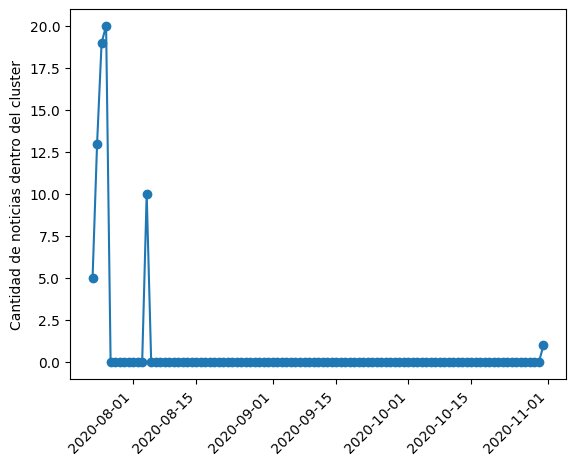

704   de utilidad pública y sujeta a expropiación


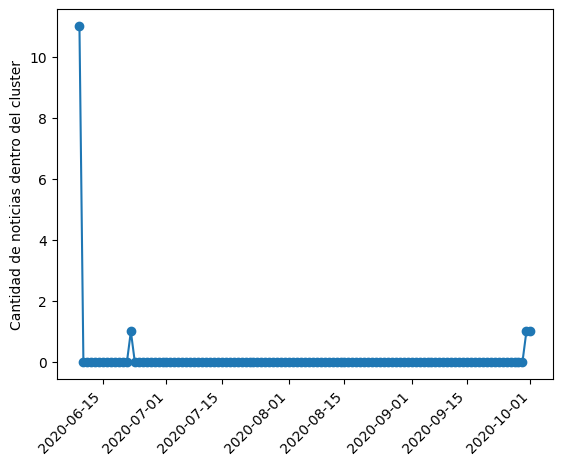

114   se abstengan de exigir o condicionar las políticas económicas de la Argentina para los próximos años


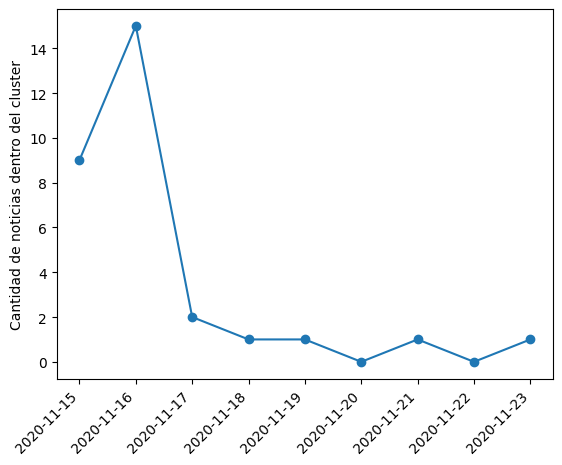

327   Por lo cual deberíamos estar en la fase 1, que es la cuarentena absoluta


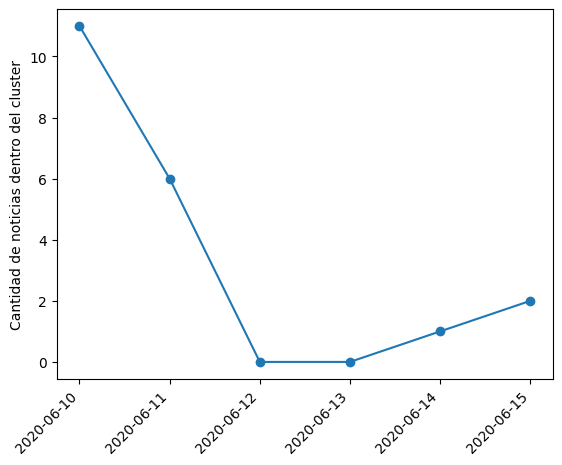

354   Hay que volver a la calma, a confiar en nuestros profesionales de la salud y empezar a retomar con cuidado y empoderando a la gente la normal actividad


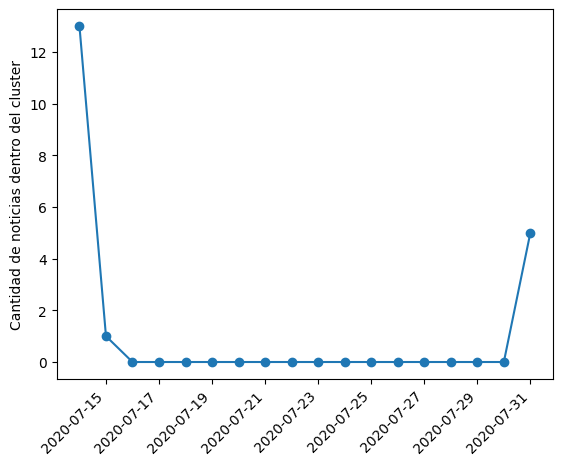

104   sin embargo, el análisis también sugiere que existe solo un margen limitado para incrementar los pagos a los acreedores privados y al mismo tiempo cumplir con los umbrales de deuda y servicio de la deuda y otras condiciones establecidas en la nota técnica de marzo


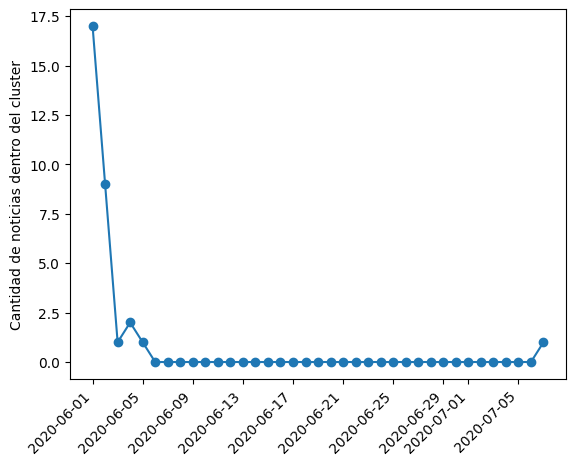

106   , señaló. Me están vendiendo falopa con las ambulancias 


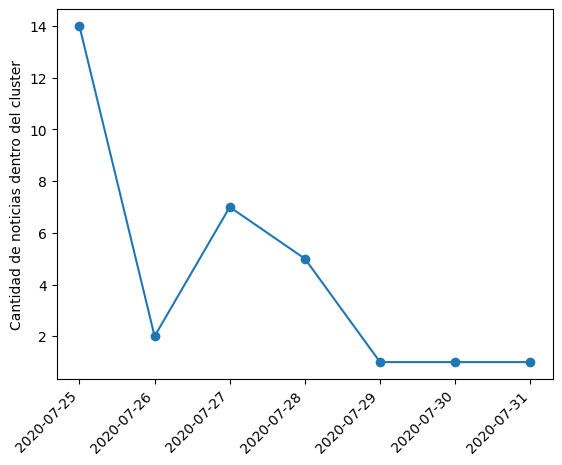

131   arbitren todos los medios necesarios para descargar y almacenar la totalidad de los datos asociados al nombre Cristina Fernández de Kirchner y Cristina Kirchner, a partir del 17 de mayo de 2020 hasta el día en que se realice la presente pericia, que surjan del contenido del panel de conocimiento del buscador Google de una persona destacada


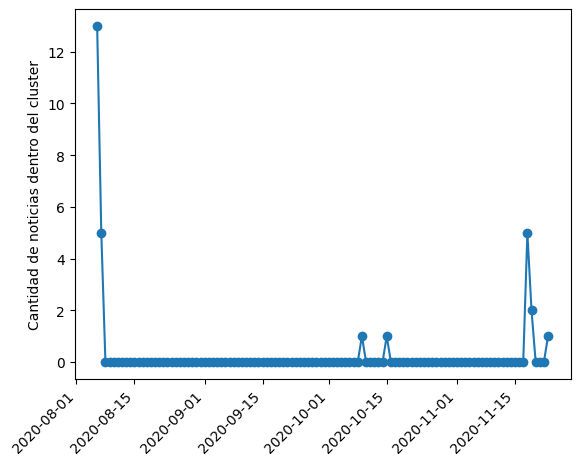

461   Hoy quiero presentar mi renuncia como embajadora, porque no estoy de acuerdo con la actual política de Relaciones Exteriores. Declino el alto honor y los privilegios que deparan tan alto e importante cargo


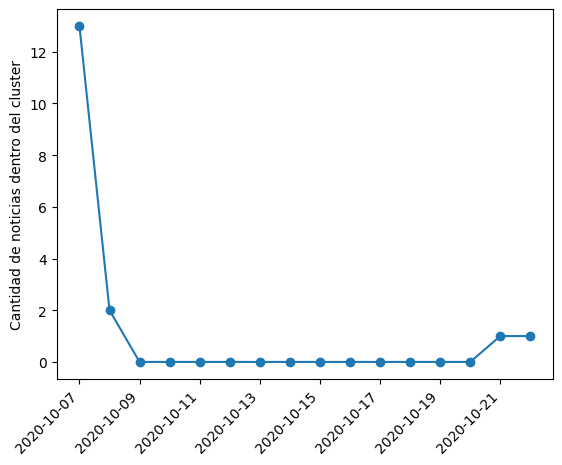

133   se declare la inconstitucionalidad y nulidad absoluta e insanable


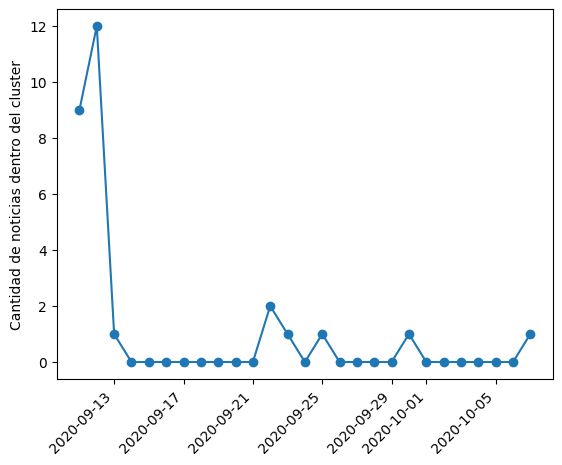

322   Es ridículo que piensen que el año que viene va a haber elecciones. La gente no lo sabe, no lo lee, o se olvida, pero entre el ’30 y el ’83 hemos tenido 14 dictaduras militares, quien ignore hoy que el militarismo se está poniendo nuevamente de pie en América no conoce lo que está pasando


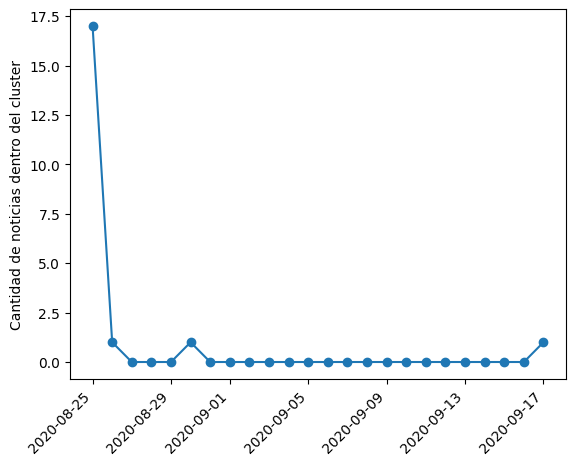

147   Estoy seguro que vamos a encontrar un mejor tiempo y estamos cerca: pensamos 60 medidas para plantearle a la sociedad, que tienden a construir un futuro más definido


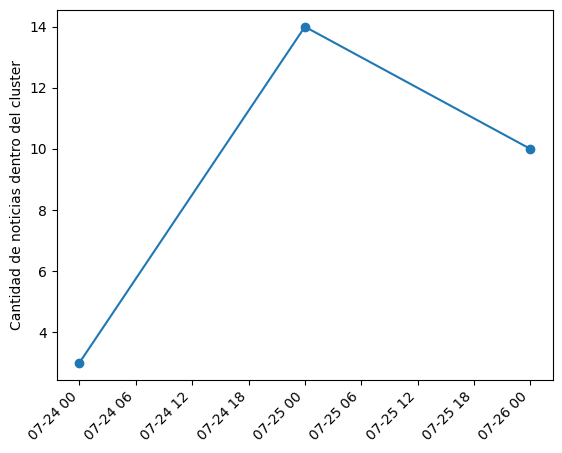

563   Entre el 18 julio y 2 de agosto vamos a intentar volver a la vida habitual en este nuevo mundo, que nos exige cuidados diferentes, y lo vamos a hacer escalonadamente. Mientras tanto, vamos a seguir trabajando en el sistema de salud


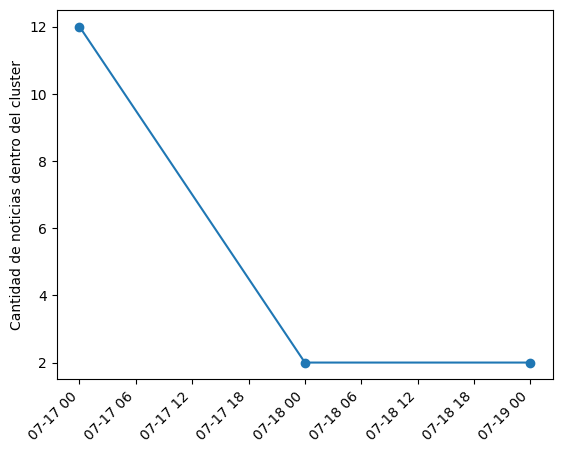

100   Que la lealtad a las convicciones, al pueblo y a la Patria sigan inalterables en tiempos de pandemia. Con la misma pasión y con la misma esperanza


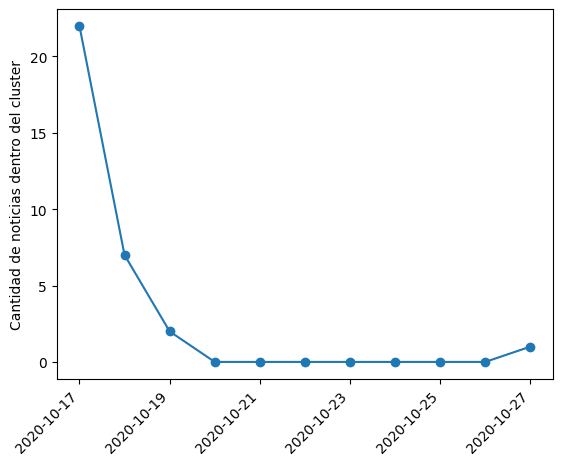

37   a la Argentina le fue mejor con el coronavirus que con el Gobierno de (Mauricio) Macri


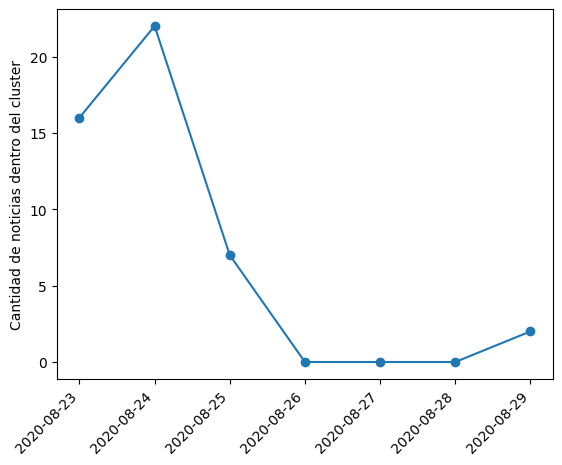

474   Al día siguiente que decreté la cuarentena, él (por Mauricio Macri) me llamó y me  recomendó que no hagamos cuarentena, que dejemos a toda la gente en la calle y que murieran los que tuvieran que morirse. Él cree eso y actúa en consecuencia. Yo, gracias a Dios, estoy muy lejos de eso


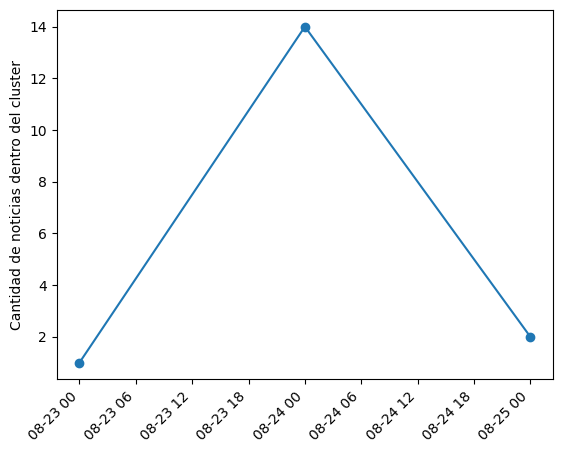

286   Ante los hechos de público conocimiento, me dirijo a Usted para pedir disculpas por mi conducta durante la sesión especial remota del día 24 de septiembre del corriente. No fue de ningún modo mi intención faltar el respeto a esta Honorable Cámara, a mis pares diputados y diputadas, ni al pueblo salteño que me eligió


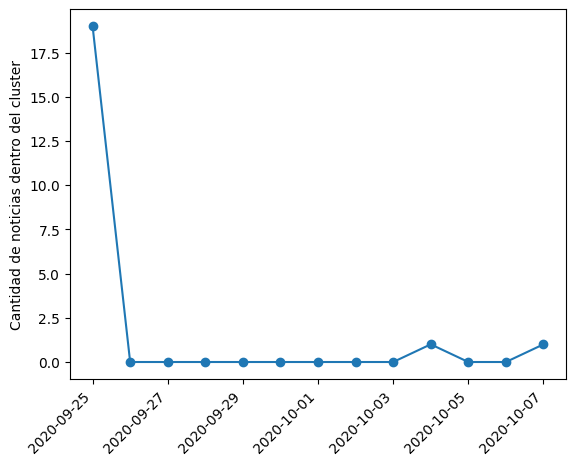

676   En síntesis, este conjunto de acciones permitirá dotar de mayor previsibilidad y volumen al mercado financiero, interactuando de manera virtuosa con la generación de un sendero económico consistente y sostenible


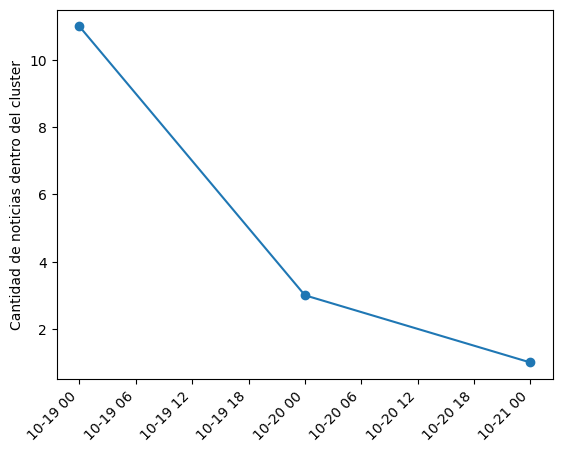

349   por la economía, la salud, la educación y la libertad de los argentinos


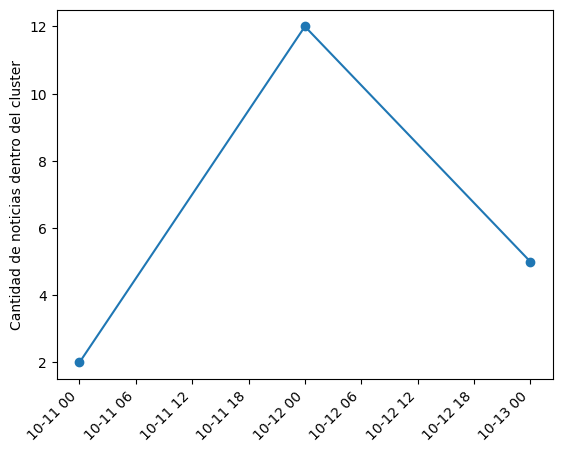

285    La gente compra 200 dólares por mes y eso genera una demanda muy grande de pequeños ahorristas. Hoy por hoy son un problema esos pequeños ahorristas. No son sumas tan importantes, pero son un problema, 200 más 200 más 200...


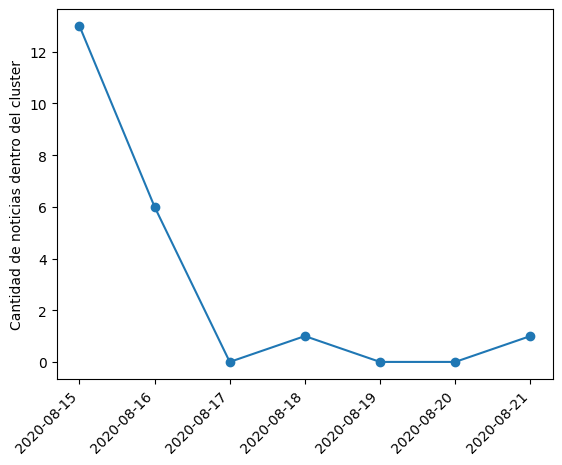

98   el objetivo de esta suba es sostener la actividad de producción de la compañía teniendo en consideración las particularidades del contexto macroeconómico del país


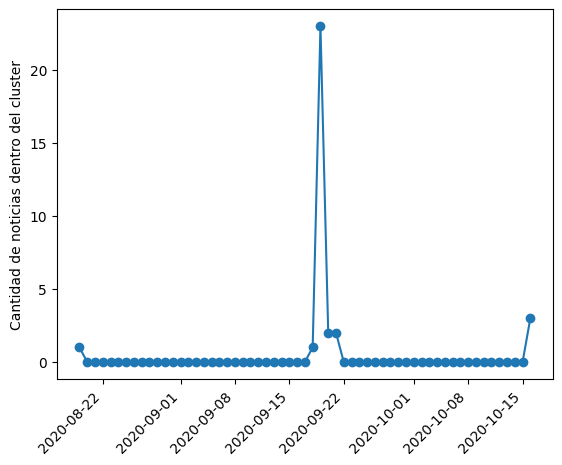

146   curar a la Argentina y ponerla de pie entre todos juntos, sin rencores ni odios


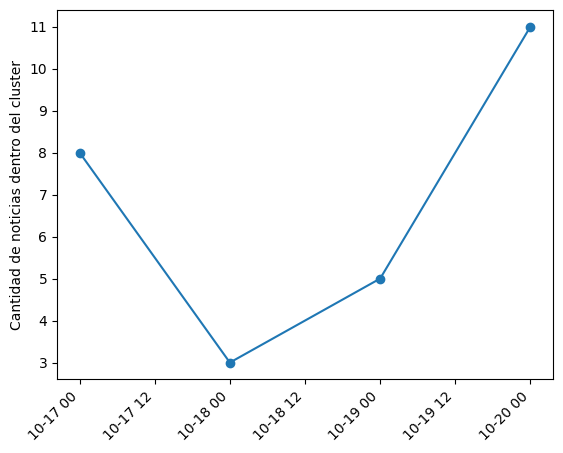

95   construir un futuro más definido


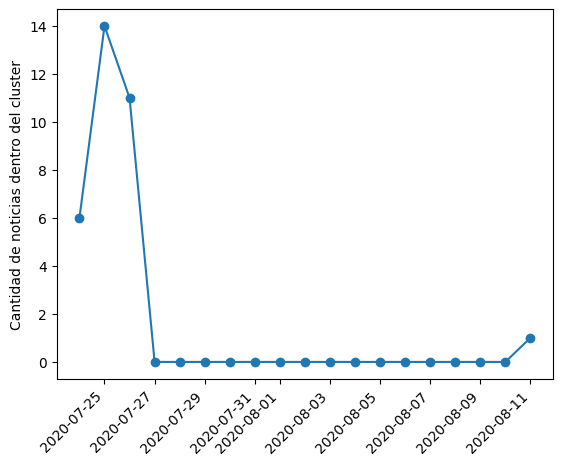

11   ladrona de la república Argentina


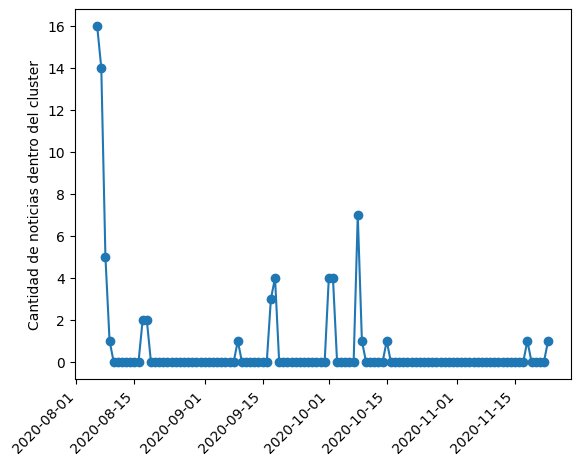

8   Orgulloso de los miles de argentinos que salieron ayer para decirle basta al miedo y al atropello, y sí al trabajo, al respeto y a la libertad


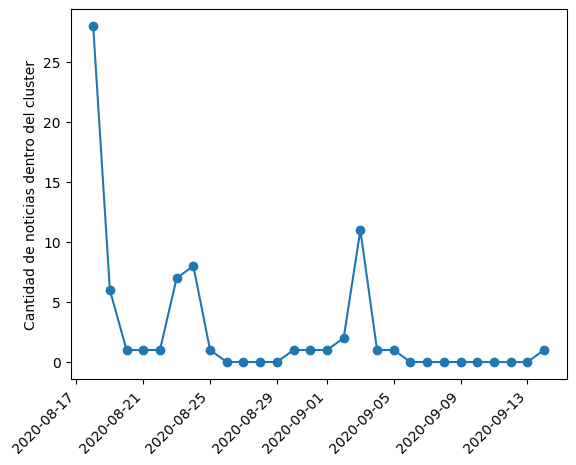

121   Wado tiene razón: para el gobierno de la Ciudad, no todos los ciudadanos y ciudadanas son iguales


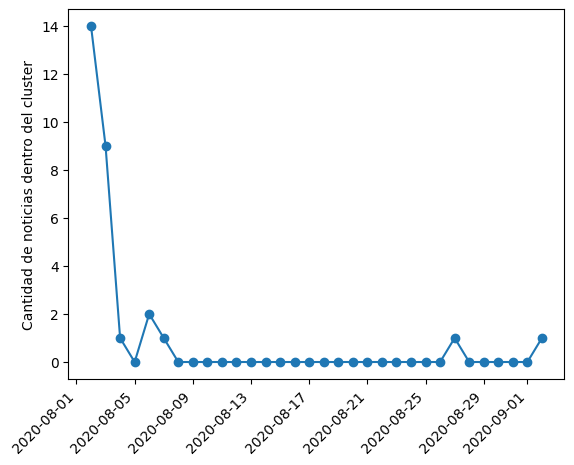

466   banderazo federal en defensa de la propiedad privada


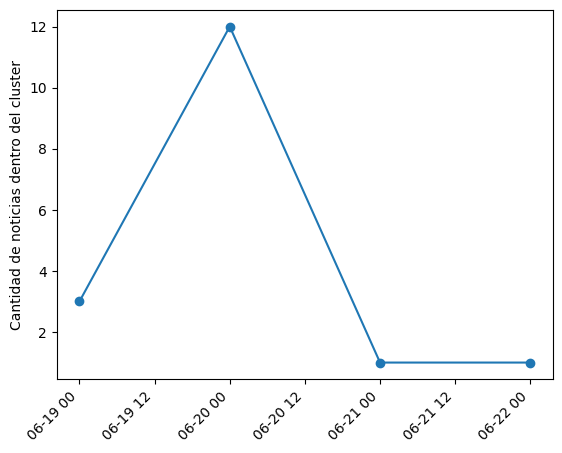

29   Comunicar en forma inmediata al Consejo de la Magistratura de la Nación cualquier intento de influencia indebida, en sus decisiones por parte de personas, grupos de poder, miembros del poder judicial, ejecutivo o legislativo, amistades o grupos de presión de cualquier índole y solicitar las medidas necesarias para su resguardo. La influencia indebida no requerirá contenido económico para justificarse


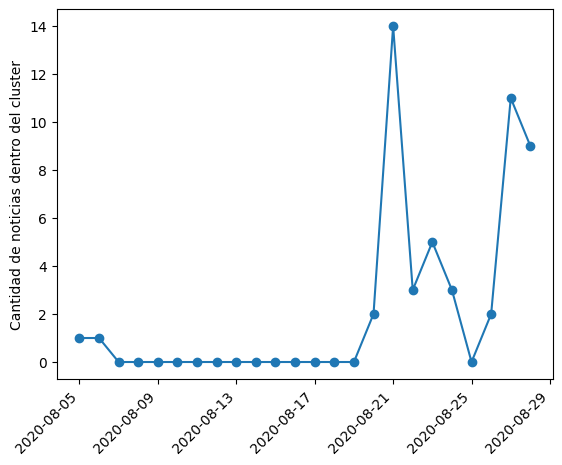

84   Quiero contarles que hace un par de horas me confirmaron el diagnóstico de COVID-19 positivo. Agradezco a todos los que me escriben con preocupación. Estoy bien, cumpliendo con el aislamiento y las indicaciones médicas correspondientes. Cuídense y cuiden a sus familias.


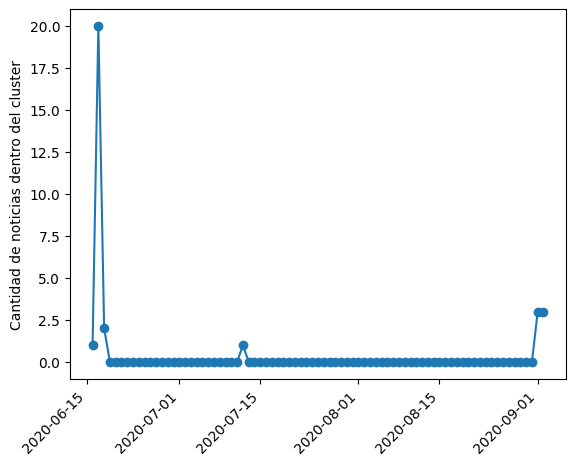

178   vine acá a terminar con los odiadores seriales. Vine a abrir los brazos para que todos nos unamos en busca de este destino común. No vengo a instalar un discurso único. Sé que hay diversidad, y la celebro; de todo tipo, de género e ideológica. Lo que necesito es que esa diversidad sea con responsabilidad; no mentir y respetarnos


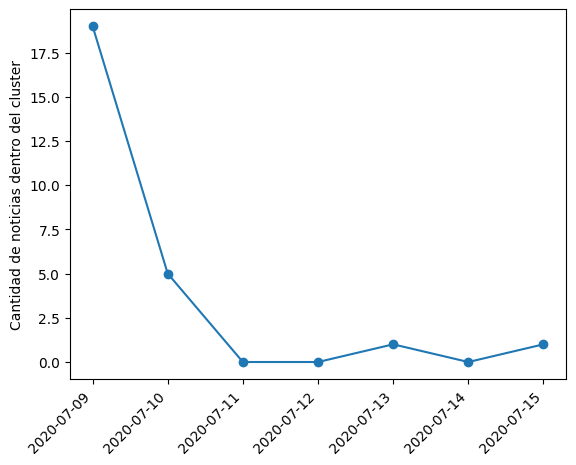

192   en pleno derecho y sin requerimiento de parte los procesos de ejecución de cualquier tipo de garantías de obligaciones financieras; la totalidad de las subastas judiciales y extrajudiciales, incluidas las hipotecarias y prendarias; la prescripción y caducidad de los créditos


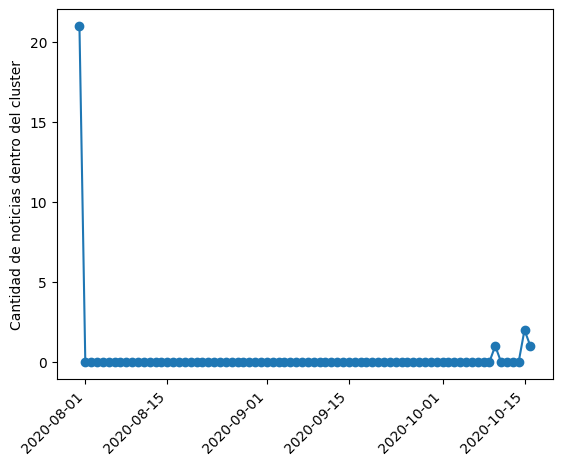

184   Unidos vamos a salir adelante


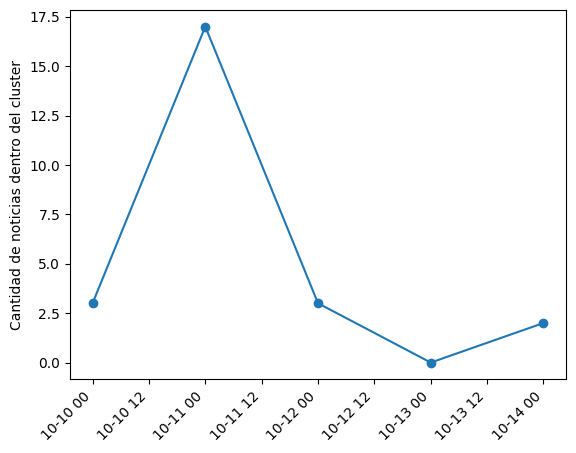

188   conformación de un órgano de Intervención


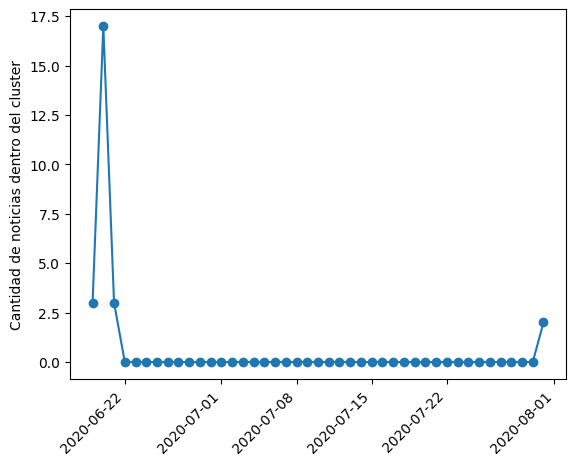

342   por los atropellos institucionales que estamos viendo.  Le expresé que ninguna pandemia era excusa para suspender la República. Ambos coincidimos en sostener y poner en valor la unidad de Juntos por el Cambio, y que teníamos el gran desafío de construir con la mayor cantidad de argentinos que defienden nuestros valores y principios


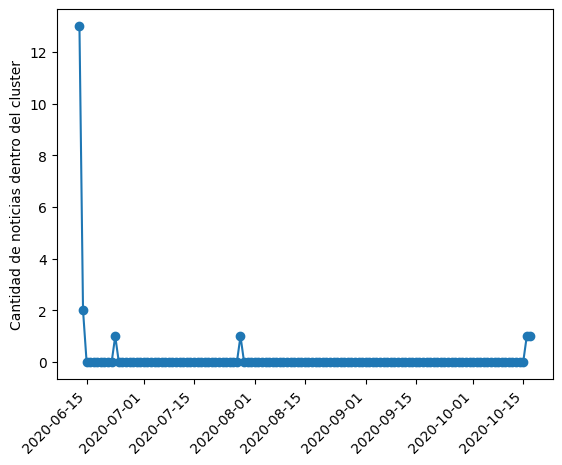

86   Es ridículo que piensen que el año que viene va a haber elecciones ¿Por qué va a haber elecciones?


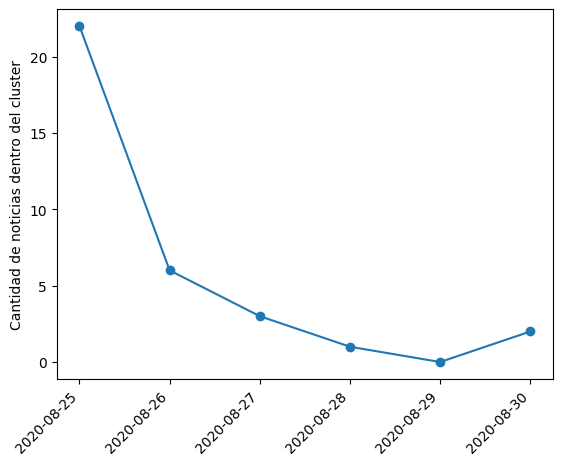

68   ningún organismo de inteligencia podrá obtener información, producir inteligencia o almacenar datos sobre personas, por el solo hecho de su raza, fe religiosa, acciones privadas, u opinión política, o de adhesión o pertenencia a organizaciones partidarias, sociales, sindicales, comunitarias, cooperativas, asistenciales, culturales o laborales, así como por la actividad lícita que desarrollen en cualquier esfera de acción


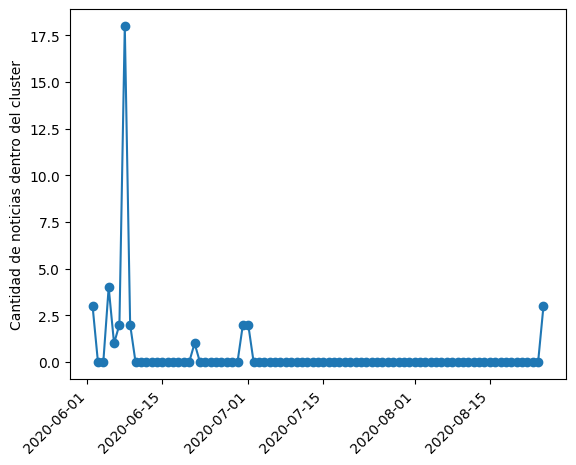

314   La reforma bajo análisis busca ampliar la base imponible de los impuestos progresivos y apuntará a que paguen más los que más tienen


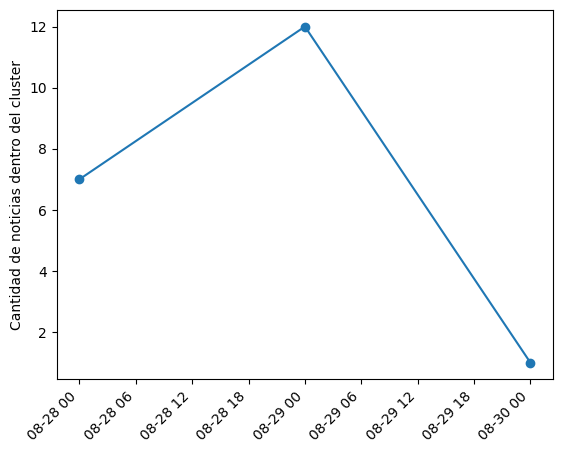

62   Se destaca que en Facebook la única página de políticos a la que le dio 'Me Gusta' es a la de Laura Alonso


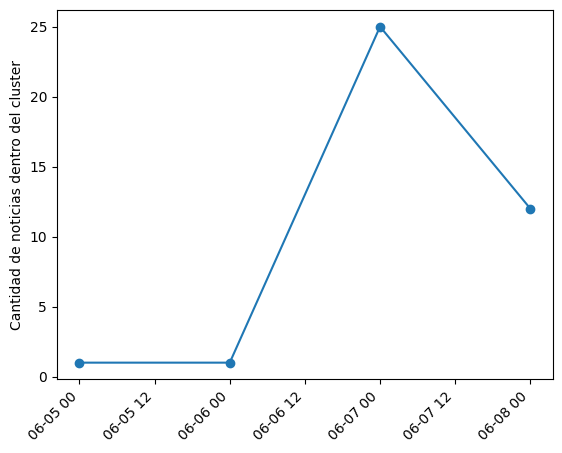

377   Nunca pude haber delegado la negociación política. Yo la delegué en mi ala más política con filo-peronistas tanto en la Cámara de Diputados y los gobernadores, yo tendría que haber puesto el foco ahí porque claramente se jugaba mucho en la Argentina en poder convencer


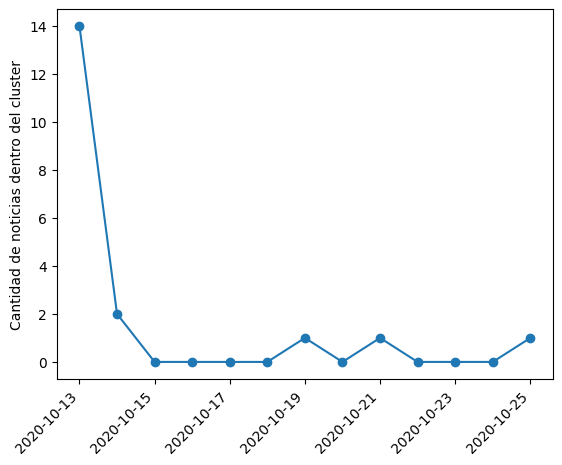

293   , finalizó.n El diputado indicó que Luján 


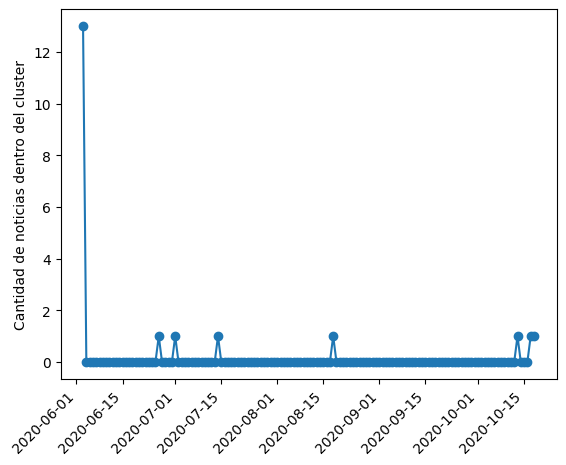

405   escondidos en los patrulleros, tocando sirenas


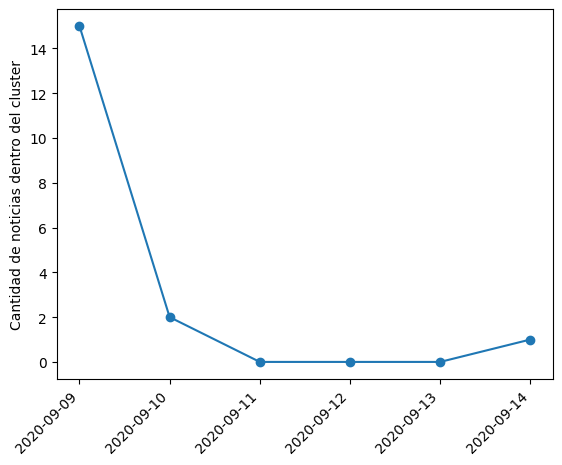

922   Los trabajadores y las trabajadoras estatales mantienen en pie la Administración Pública Nacional y respaldan las políticas del Gobierno en uno de los momentos más graves de la historia argentina


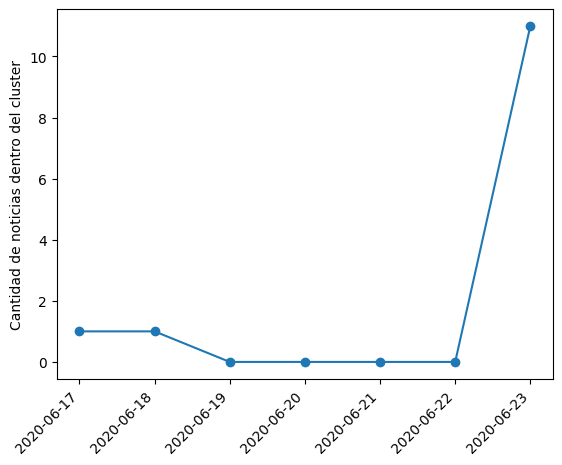

278   distintos modelos productivos y las cadenas de valor


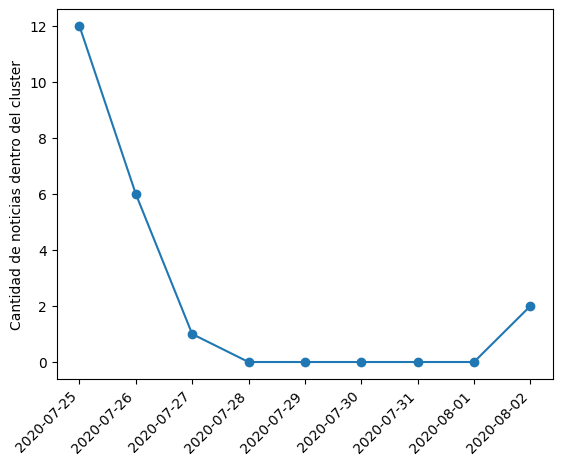

2   la ruta del dinero K 


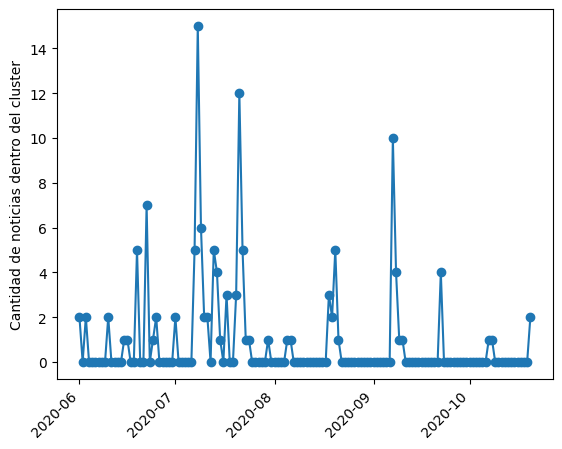

149   crear 300.000 puestos de trabajo mediante las diferentes herramientas del plan


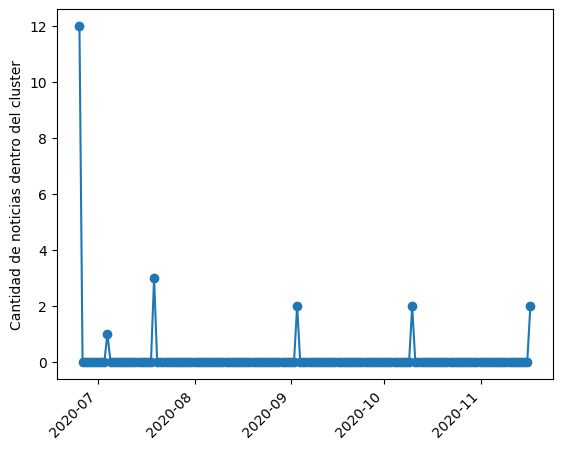

1   , expresó Aráoz. Recordó además que 


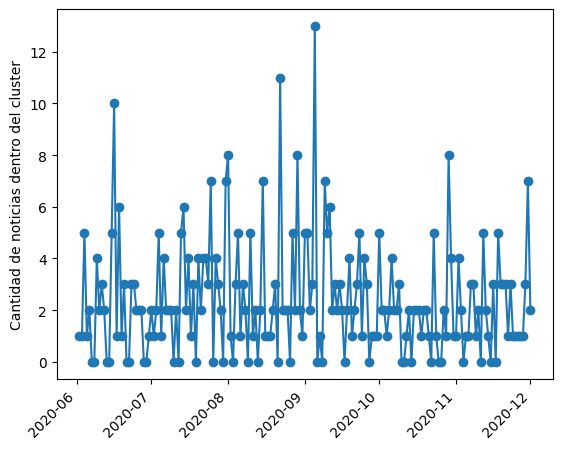

19   que se mueran todos los que tengan que morirse


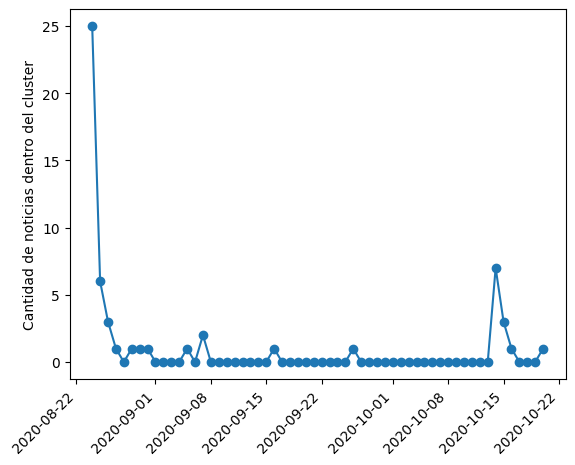

359   una muy mala señal en este escenario tan complejo


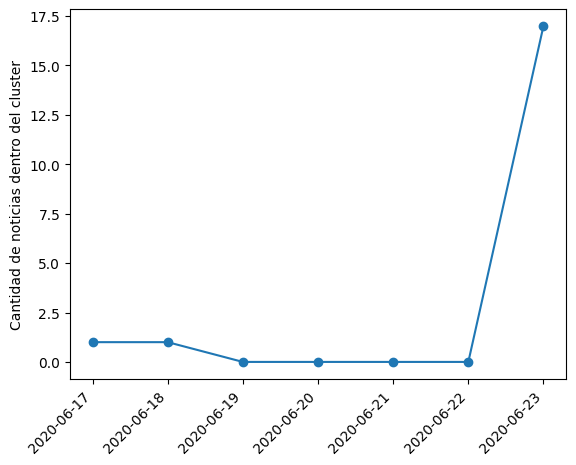

57   cuando se mandan cagadas y venden falopa, yo los tengo que cubrir, como me están vendiendo falopa en las ambulancias


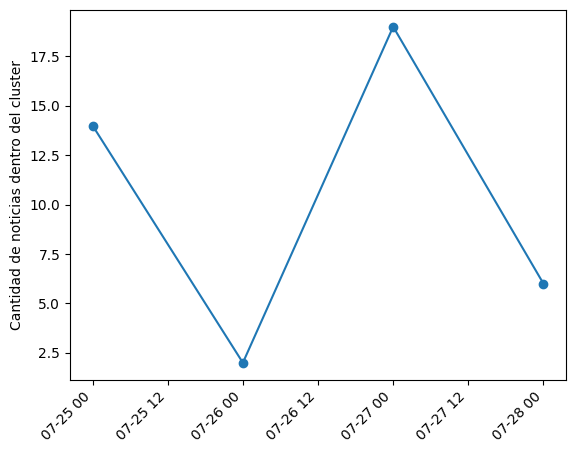

641   Gracias al sanatorio y al equipo médico que me acompañó hoy [por ayer] durante mi intervención. Gracias también a todos por sus buenos deseos y cariño. Estoy muy bien, recuperándome


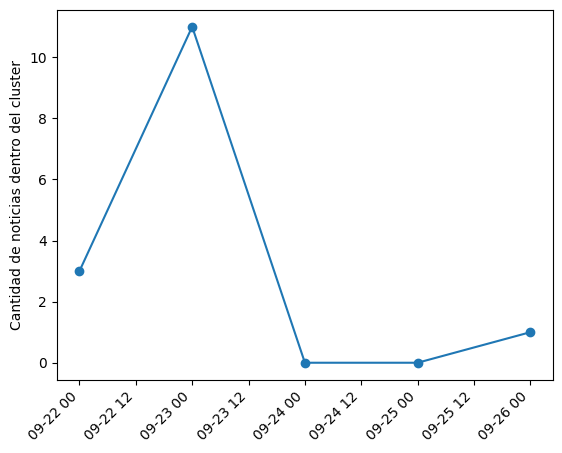

254   No nos van a doblegar los que gritan. Los que gritan suelen no tener razón y nosotros sabemos a qué vinimos


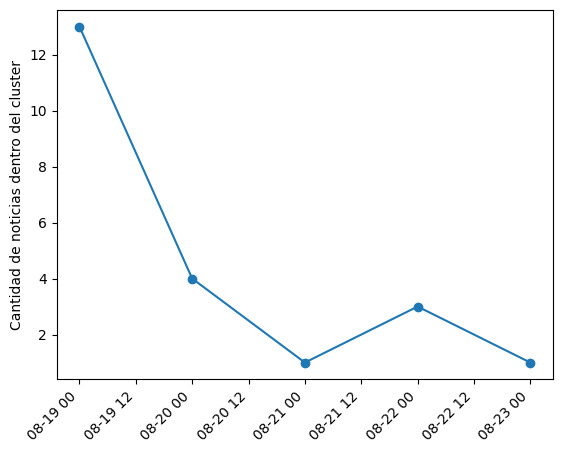

120   Como tal y como inversores a largo plazoen Argentina, nuestro objetivo siempre ha sido lograr una reestructuraciónconsensuada que ofrezca la mejor oportunidad para que el país forje un caminosostenible hacia un futuro económico más fuerte y un crecimiento inclusivo enel mundo posterior al Covid-19


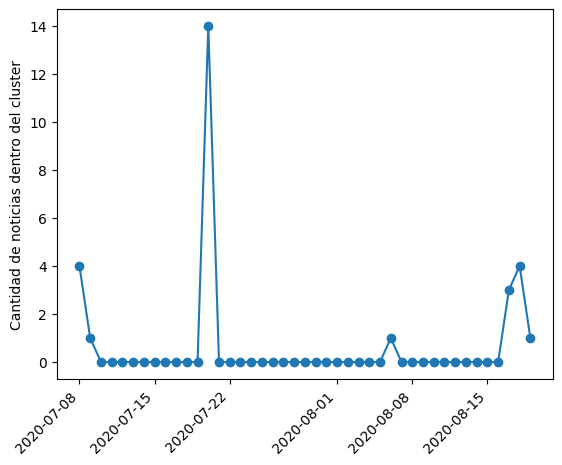

81   La Argentina que se viene nos necesita a todos


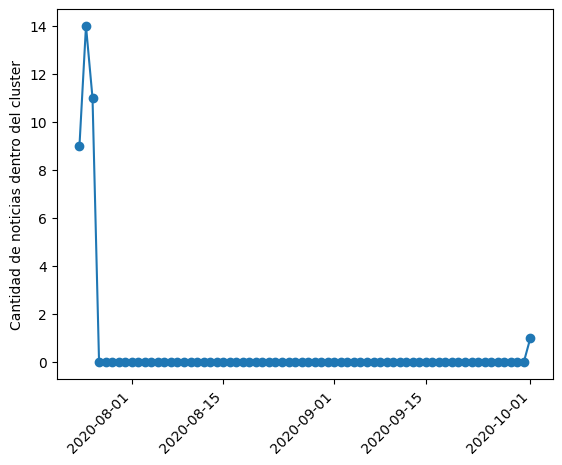

103   .   López concluyó: 


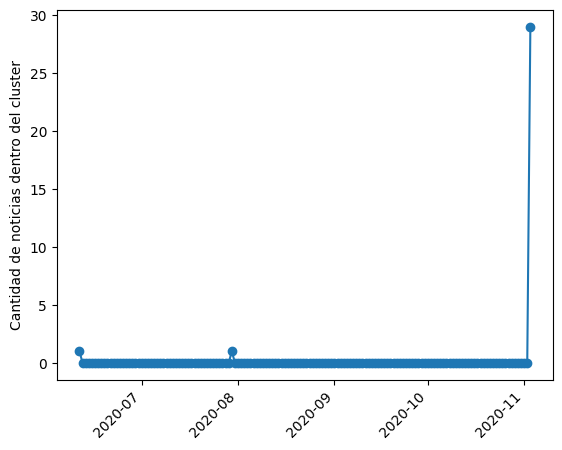

535   en un proyecto de ley para transferir la responsabilidad del pago al Ministerio de Economía, para que desde el Tesoro Nacional se abone la deuda con quienes tienen que cobrar mes a mes la reparación histórica de los jubilados y jubiladas


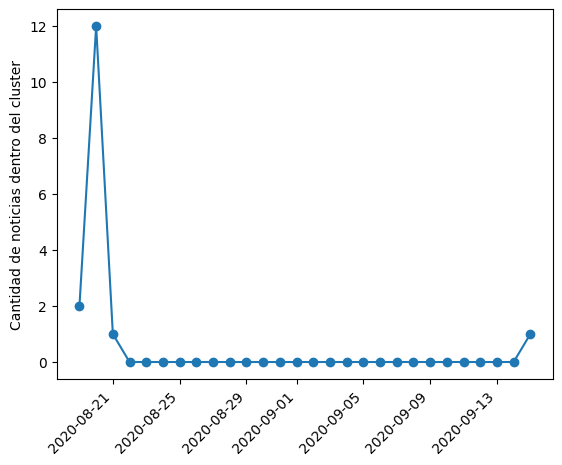

402   los principales afectados por el deterioro del mercado laboral son los trabajadores informales y cuentapropistas, a quienes, en muchos casos, la merma en los ingresos podría ocasionarles caer por debajo de la línea de pobreza


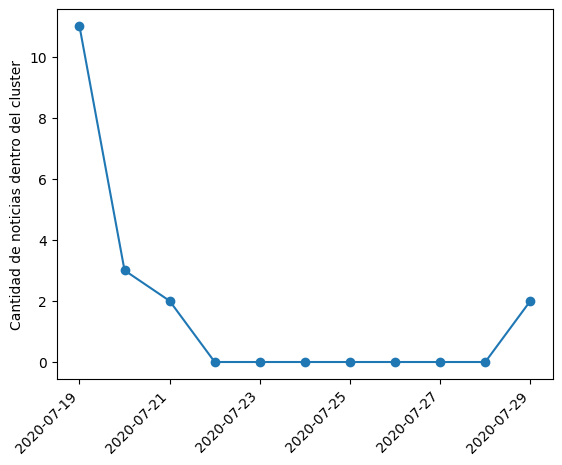

144   Nos sentimos agraviadas y heridas en lo más profundo de nuestro corazón, al ver que Ud. sentó en su mesa a todos los que explotan a nuestros trabajadores y trabajadoras, y a los que saquearon el país. Lo más grave de todo: a los que secuestraron a muchos de nuestros hijos e hijas que luchaban por una Patria liberada


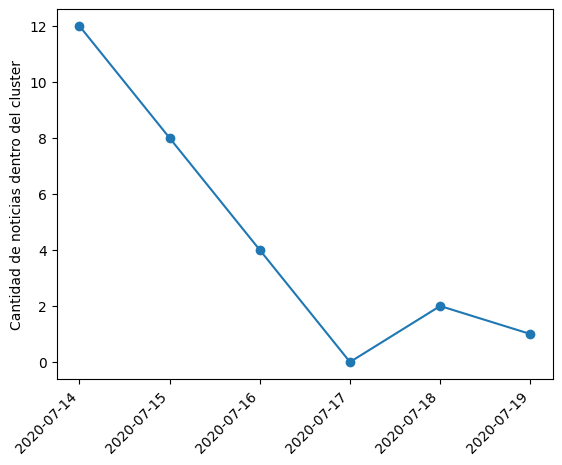

619   en suma, estimamos que la cuarentena ocasionaría una pérdida de 400.000 asalariados privados registrados


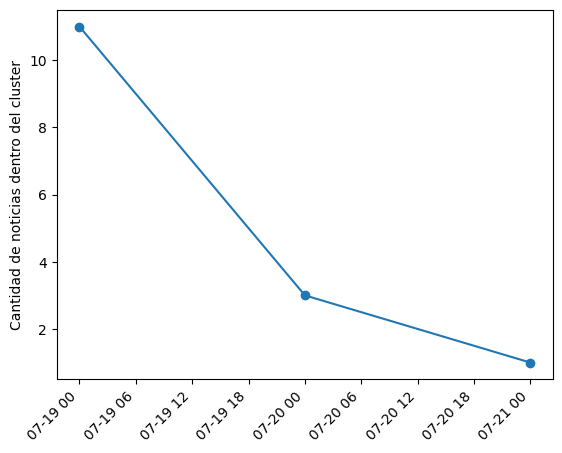

308   Existen indicios que nos permiten sostener que Vicentín no solo habría simulado su estado de cesación de pago sino que, a su vez, habría utilizado su estructura en el exterior y/o la de Glencore para remitir sus ganancias al extranjero


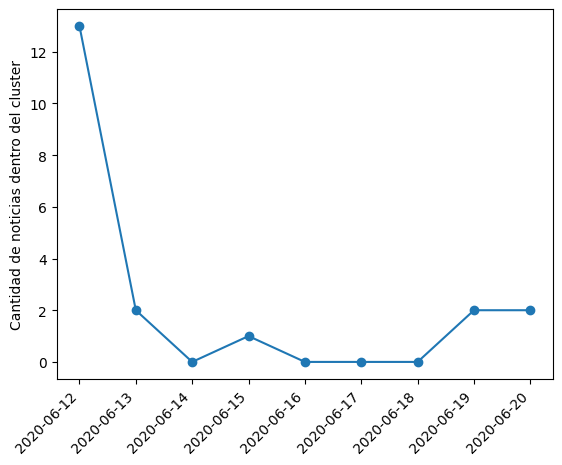

6   Ingreso Familiar de Emergencia - Consulta de pago


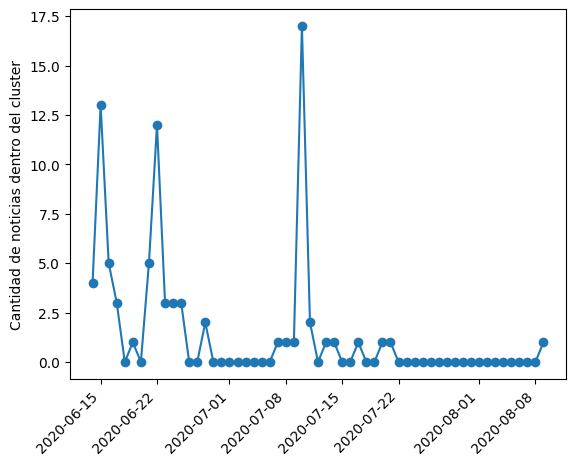

277   Ustedes saben muy bien –respondió Fernández– que en la mesa de este presidente se sienta gente de empresas grandes, medianas y pequeñas, trabajadores y trabajadoras, movimientos sociales, estudiantes, jóvenes, nuestros científicos, todos y todas, porque esa es mi responsabilidad.


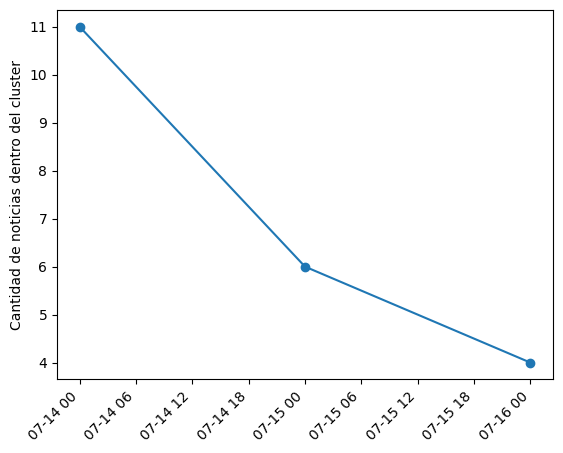

251   Los gobernadores y las gobernadoras estamos juntos al Presidente (Alberto Fernández) y a cada intendente en todo el país al frente de esta lucha para reducir los daños y salvar la mayor cantidad de vidas posible


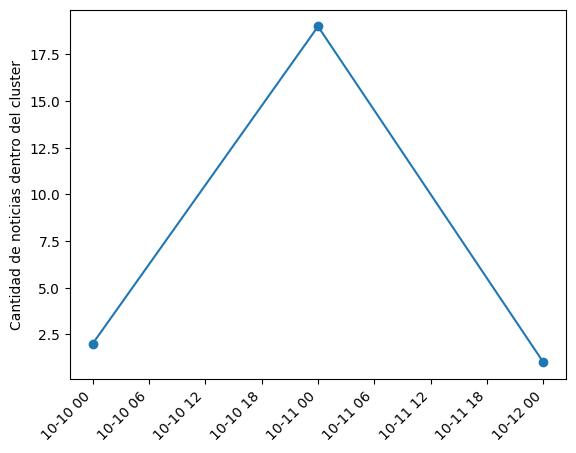

552   Es falsa la versión que el Presidente ha dado sobre nuestra conversación. De ninguna manera dije las cosas que ha relatado en estos días


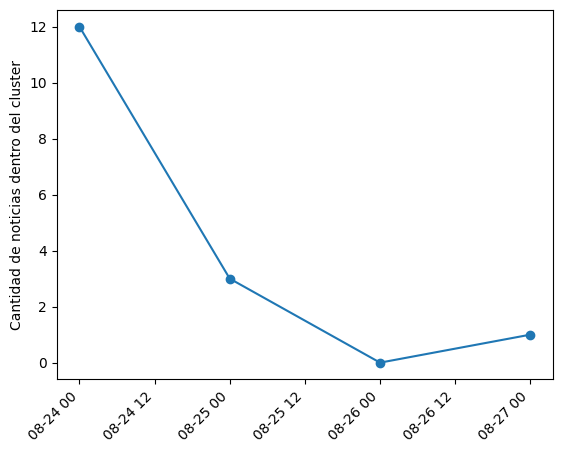

227   Consciente de la responsabilidad que mi cargo representa, pongo a disposición mi renuncia como diputado nacional, y seguiré trabajando por mi querida provincia de Salta y para que Argentina se ponga de pie.


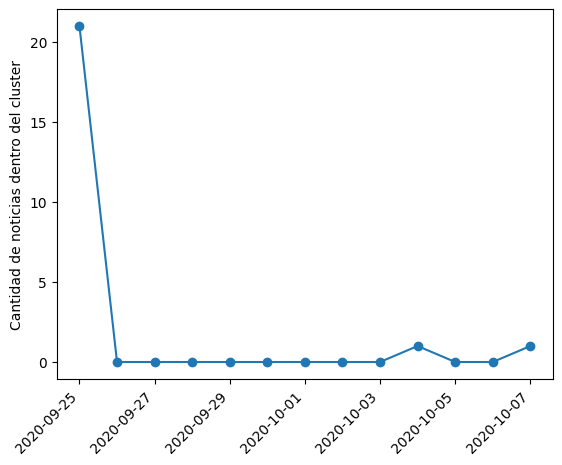

492   17A en defensa de las instituciones fundamentales de la democracia republicana


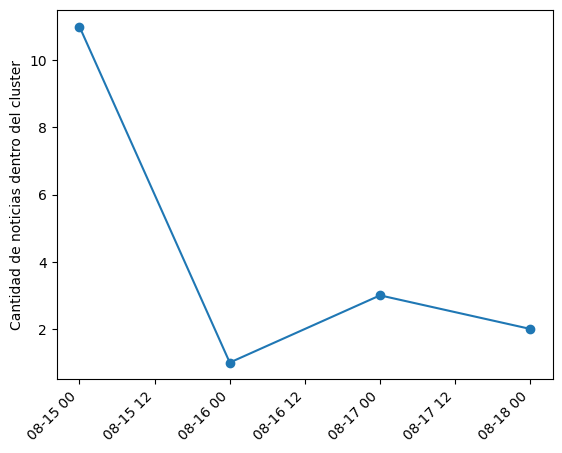

135   Estamos a tiempo. Para defender el presente y para ganar el futuro


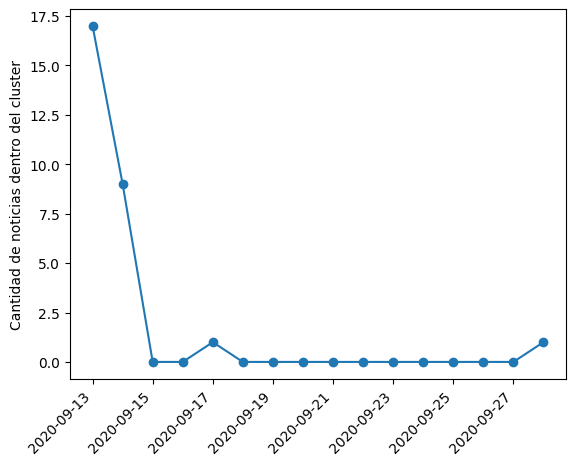

125   cuando empiece a pagarse el IFE 3 tenemos que hacer el empalme y empezar a pagar esta renta universal, y lo venimos conversando con actores políticos, sociales y sindicales


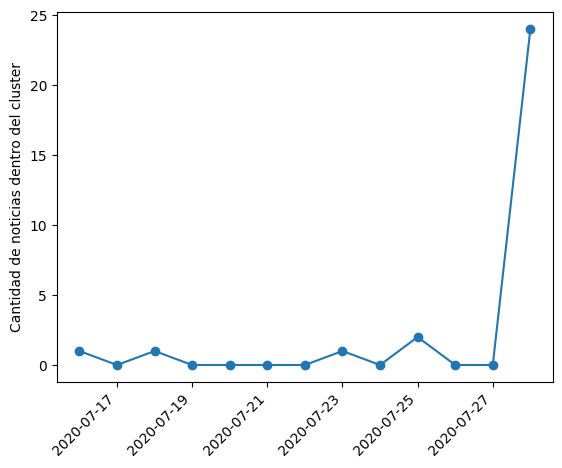

291   obras públicas que mejoren la infraestructura


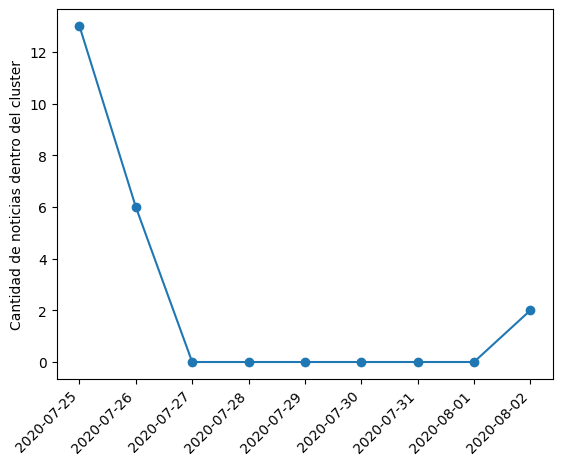

841   si alguien convocara a mi mamá a una marcha, lo mato. Yo le diría: ‘¿jugar con la salud de mi vieja? De ninguna manera


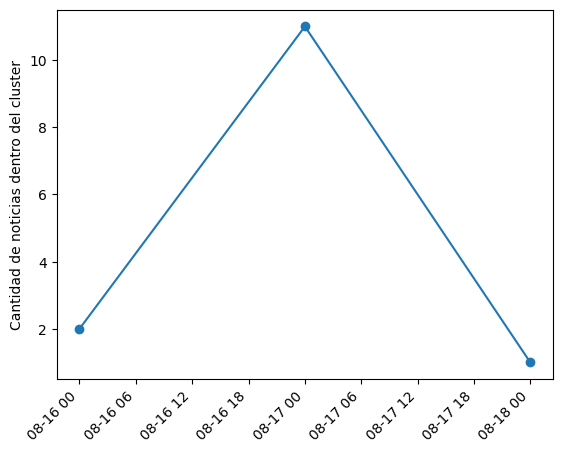

139   La oferta va a estar abierta hasta fines de agosto, es un esfuerzo enorme el que hemos hecho para cumplir con nuestra palabra; nuestra palabra era poder hacer un acuerdo que le permita a la Argentina cumplir con los acreedores y que nos permita a los argentinos no postergar más a los que ya están muy postergados


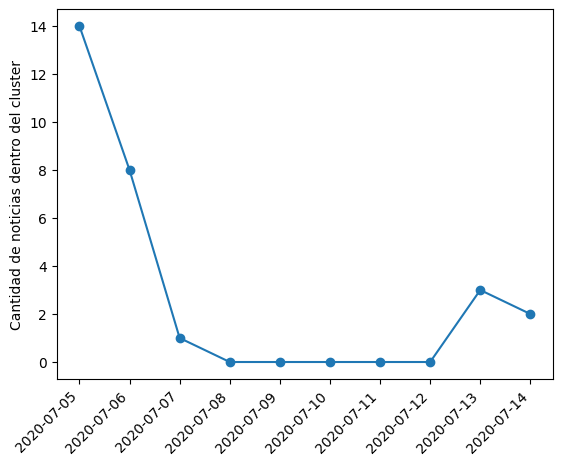

10   Es parte de una enorme planificación inteligente y empática de un Estado que quiere proteger y cuidar a sus argentinos y argentinas


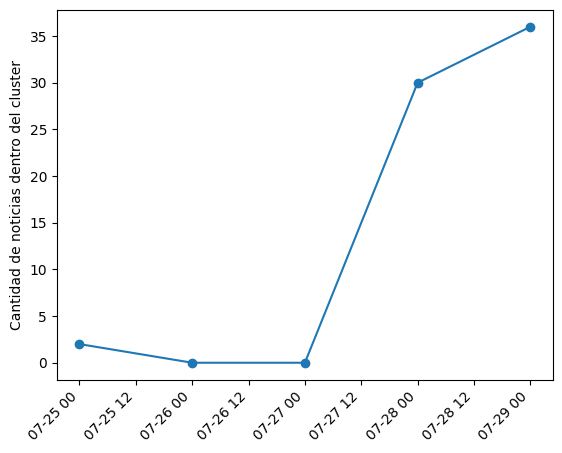

820   Que tres presidentes de tres partidos -el PRO, la UCR y la Coalición Cívica- se animen a firmar un documento como el que ayer firmaron, sembrando dudas sobre las razones de la muerte de Fabián Gutiérrez es realmente canallesco


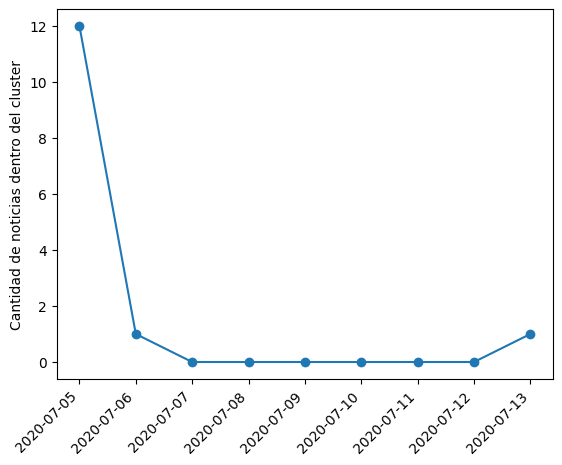

90   Mesa de Encuentro Libertador General San Martín. Agustín Rossi 


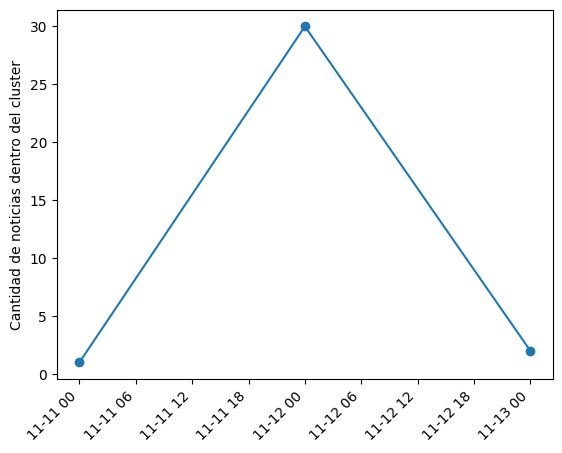

408   El ATP ha sido y es una herramienta fundamental para reducir el impacto sobre la actividad productiva, sostener el trabajo y acompañar a las empresas en este duro contexto.   Definimos una nueva ronda para seguir protegiendo el saber hacer de la economía y tener bases sólidas que propicien un mejor horizonte de recuperación


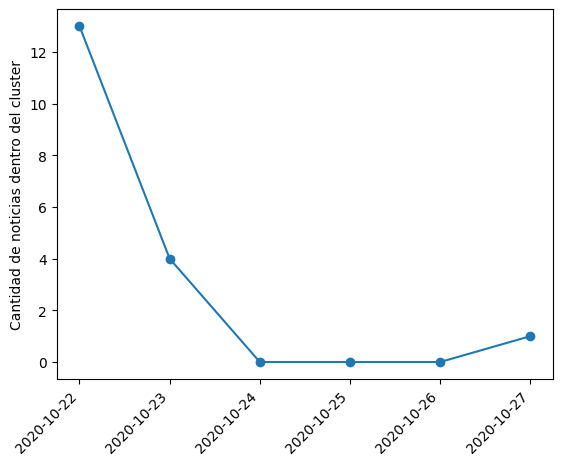

321   . No está en la cabeza de ninguno de nosotros andar expropiando empresas


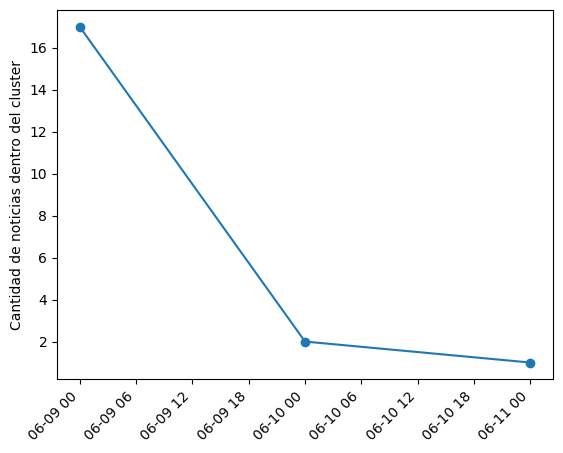

165   Recién llegado a una sociedad donde se vive en libertad y con responsabilidad. Acá haré la cuarentena europea y recién ahí puedo ir a trabajar a Zúrich (Suiza)


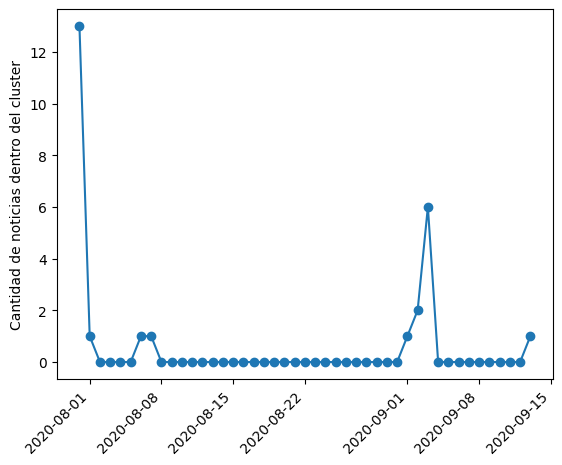

250   nuevos embargos sobre cuentas bancarias, excepto para el caso de los procedimientos de comprobación y pronto pago de créditos laborales, y créditos de origen alimentarios


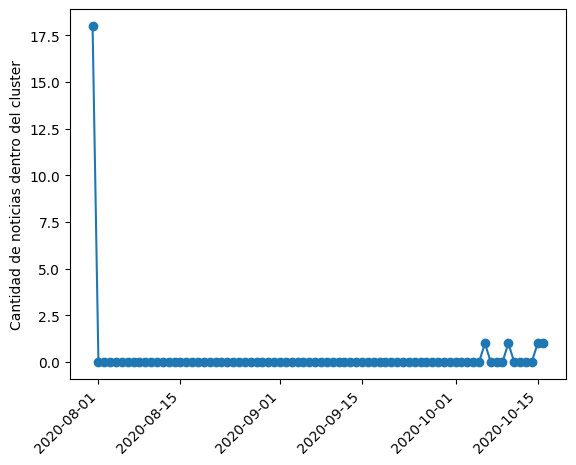

305   motorizar la producción y el consumo


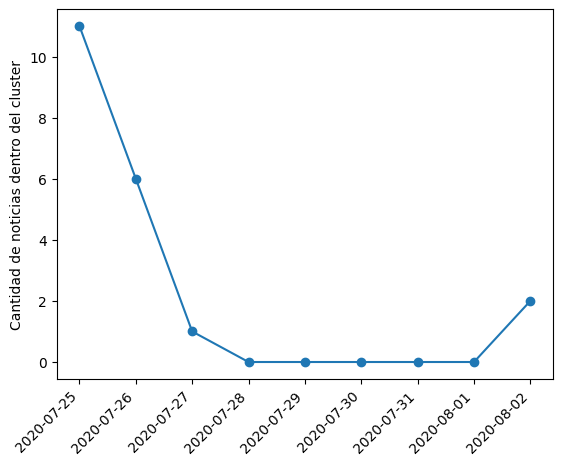

20   , enfatizó. El gobernador aseguró que 


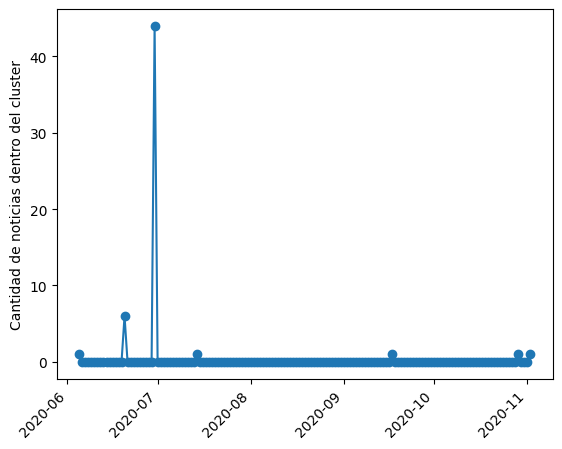

506   contención de los sectores más vulnerables es clave


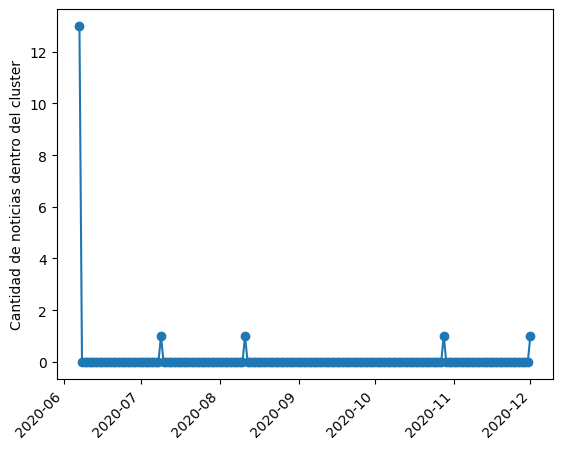

324   Estamos pensando un sistema tributario que privilegie la producción, la equidad, la igualdad. La equidad en materia tributaria aún tiene mucho camino por recorrer


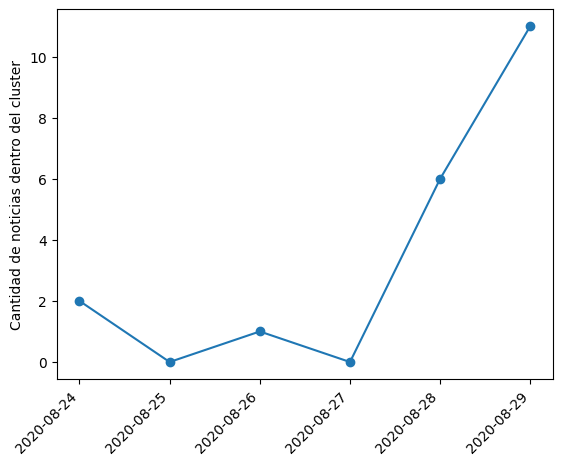

3   el aislamiento social, preventivo y obligatorio ha creado una serie de desafíos


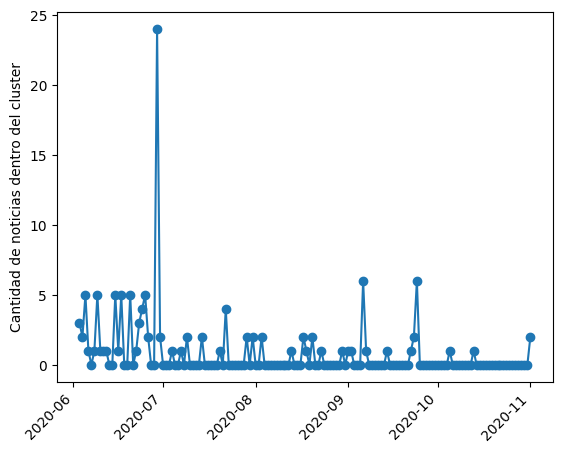

109   la industria nacional, los pequeños y medianos empresarios y con los trabajadores


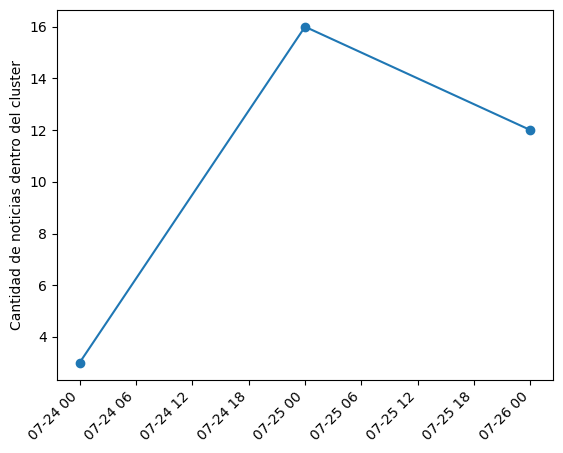

202   Imaginen lo que hubiera sido esta pandemia con (el ex presidente) Mauricio Macri gobernando. Una catástrofe


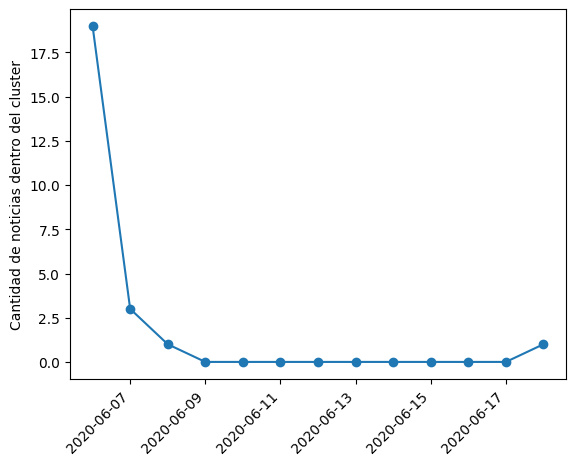

43   incrementar su producción hasta el máximo de su capacidad instalada y a arbitrar las medidas conducentes para asegurar su transporte, distribución y comercialización en todo el país durante el período que dure la emergencia sanitaria


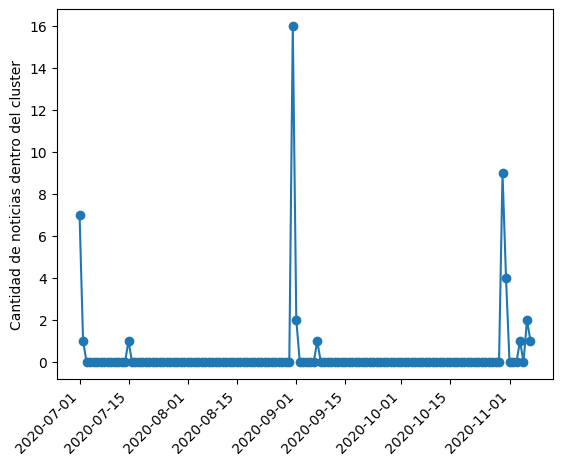

542   Y ha tenido relaciones turbulentas con el FMI durante tiempo. Lo que vemos ahora es una oportunidad para que el país rompa con este ciclo y esa oportunidad debe anclarse en algo, que es devolver la deuda a un nivel sostenible


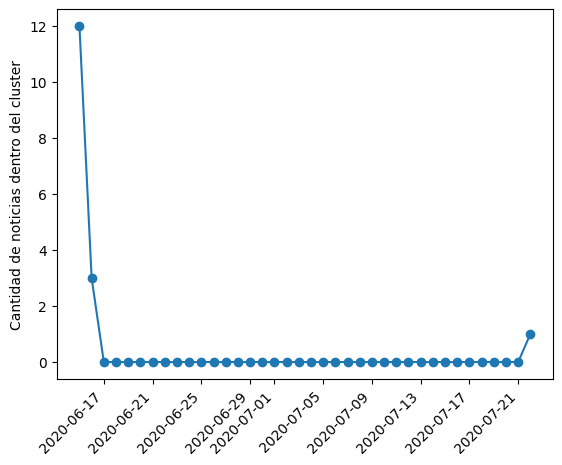

816   Hoy es un día muy importante, Bolivia recupera la democracia (...) Se termina la pesadilla que duró un año exacto. Estoy muy contento de estar acá y de que el pueblo boliviano se haya expresado y que tengamos autoridades legítimamente constituidas


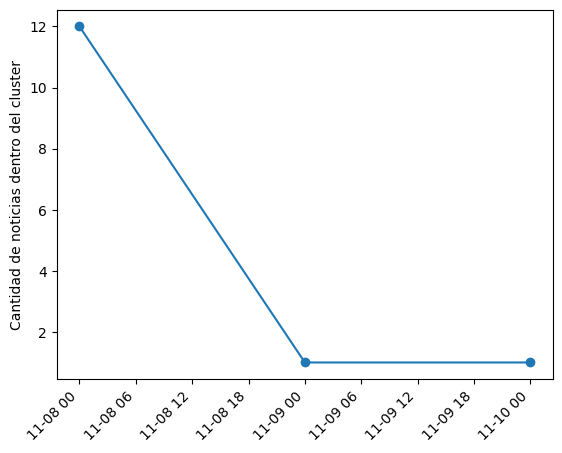

12   Desde el Gobierno ha comenzado a hablarse de la creación de un ingreso básico universal, con carácter permanente. De avanzar en esta dirección, para su puesta en marcha es preciso determinar un monto por beneficiario adecuado con el objetivo de erradicar al menos la pobreza extrema y mejorar la distribución del ingreso


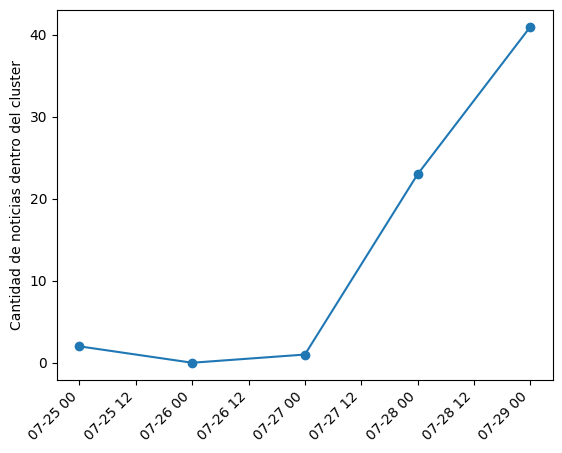

32   incumplimiento del distanciamiento social, preventivo y obligatorio


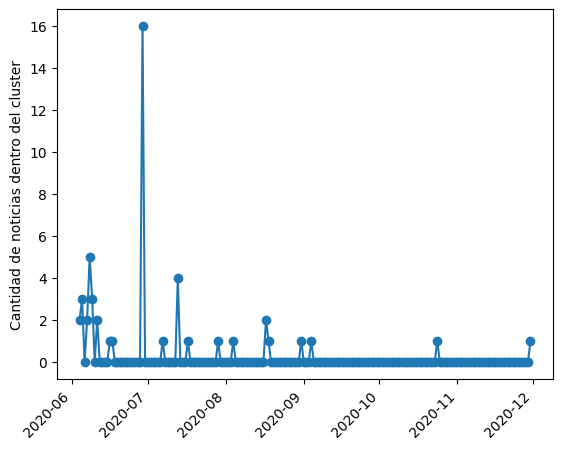

307   A 26 años del atentado a la sede de la AMIA quiero continuar la política iniciada en este ámbito en 2003 y continuada posteriormente, y requerir a las autoridades de la República Islámica de Irán que cooperen con las autoridades judiciales argentinas para avanzar en la investigación de dicho atentado


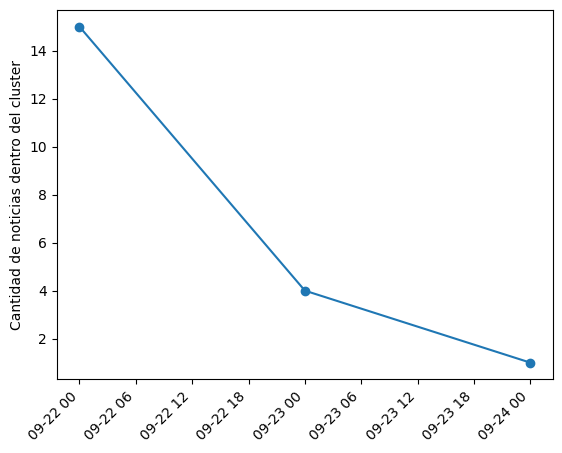

79   Vos no vas a salir VIVA de este estallido social. Vas a ser la primera - junto con tus crías políticas - en pagar todo el daño que causaron. TE QUEDA POCO TIEMPO


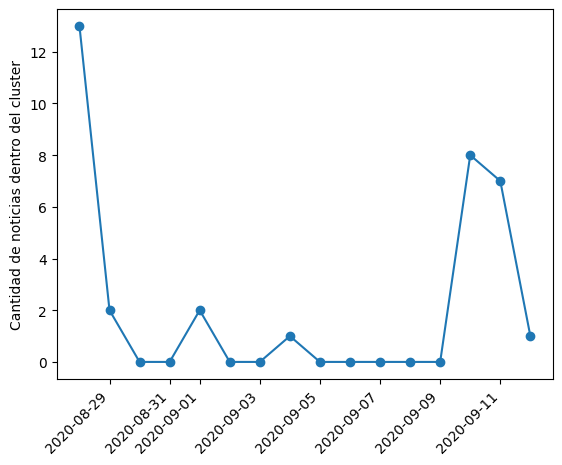

53   son servicios públicos esenciales y estratégicos en competencia


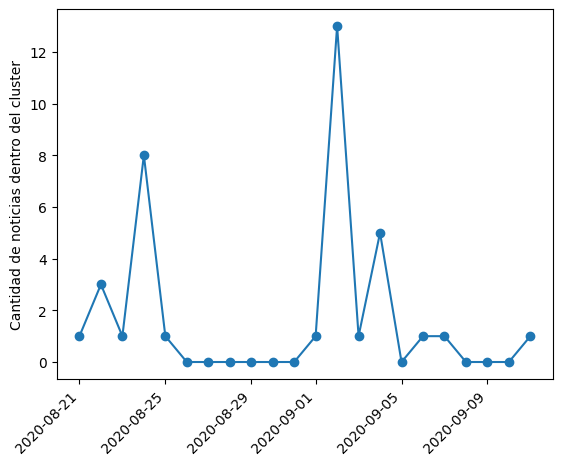

14   proyecto que están evaluando en un contexto complejo para las economías familiares


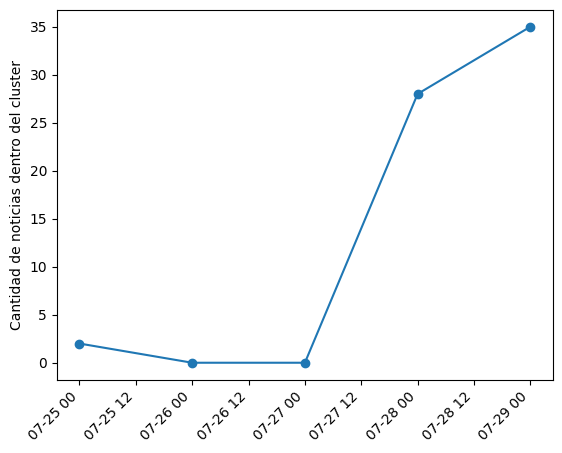

132   No va a haber elecciones porque Argentina es la campeona de las dictaduras militares. Por supuesto que puede volver a haber un golpe


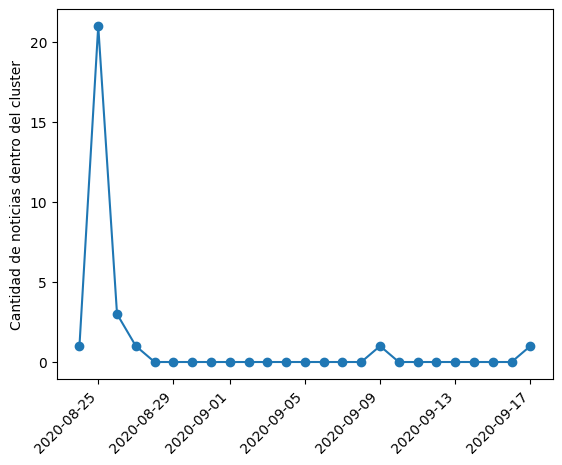

118   Le exigimos a Horacio Rodríguez Larreta y a Diego Santilli que frenen ya esta locura que lleva adelante la Policía de la Ciudad. Este homenaje popular no puede terminar en represión y corridas a quienes vienen a despedir a Maradona


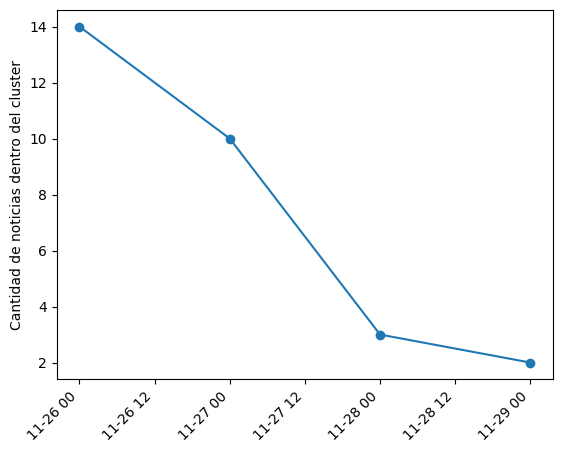

406   los dólares hacen falta para producir; no para guardar


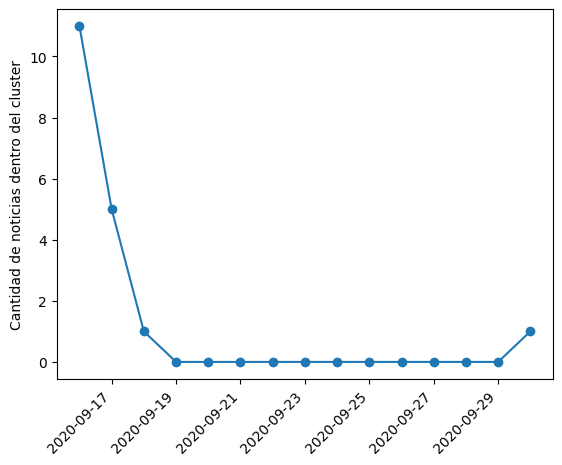

350   Gracias a Monzó y Frigerio logramos tener las leyes más importantes y construir gobernabilidad durante los cuatro años de gobierno, con enorme minoría legislativa y estructura política


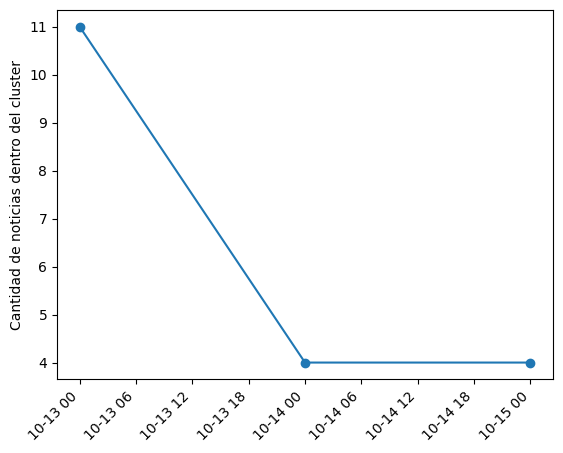

218   cada vez que hubo marchas, 15 días después crecieron los casos de coronavirus


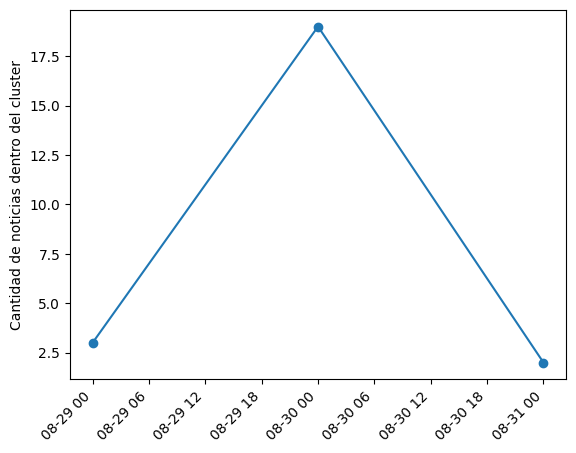

166   Reducir desigualdades para una Argentina Federal


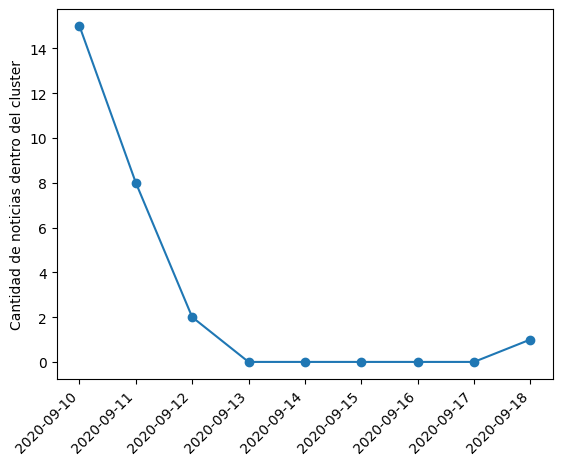

142   Néstor. El hombre que lo cambió todo


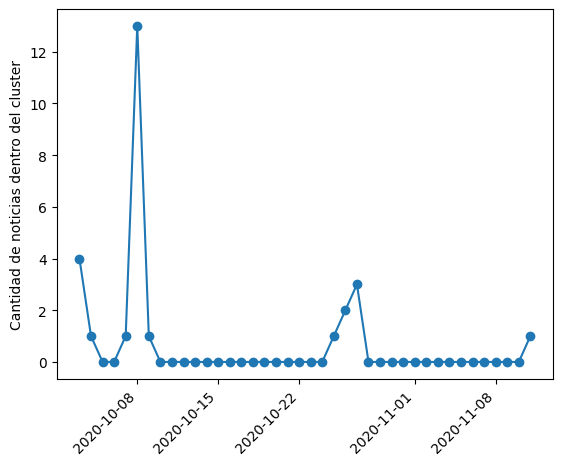

358   El acto del 17 (de octubre, por el Día de la Lealtad) es de todos nosotros. Si alguien está pensando hacer un acto para que yo tome distancia de Cristina (Kirchner), se equivoca, porque no lo voy a hacer. Lo que más necesitamos es estar unidos


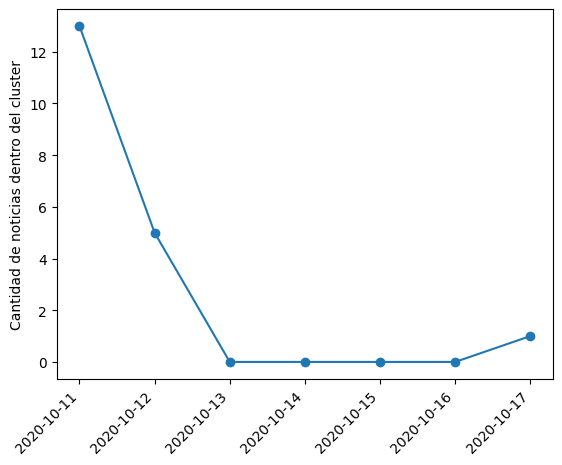

225   para empezar a corregir los desequilibrios de un país concentrado. Necesitamos reabrir el diálogo sobre la distribución de recursos para evitar cualquier tipo de favoritismo en distribución de fondos o proyectos. En este sentido, recuerdan que 


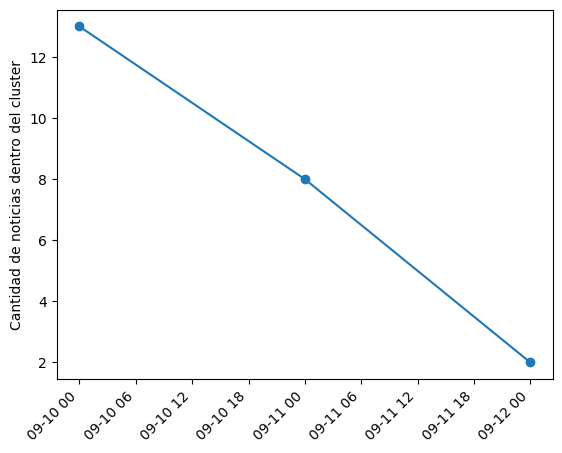

160   Esta decisión se da en pos de avanzar con los objetivos de producción de la compañía, teniendo en consideración las particularidades del contexto macroeconómico del país


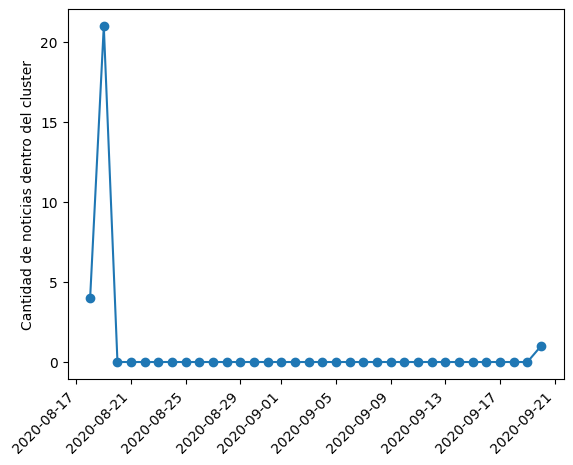

73   están defendiendo el derecho a la propiedad privada


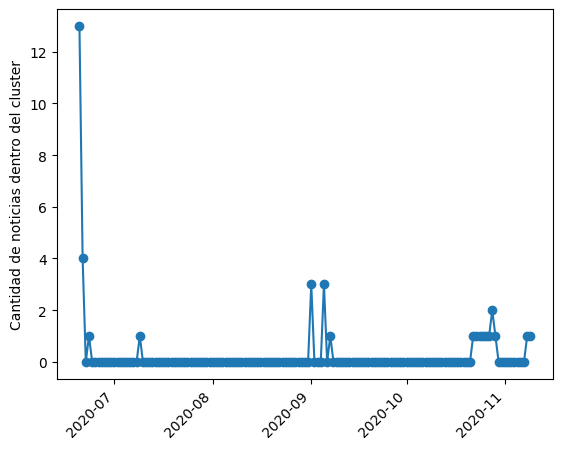

124   todavía no es una cuestión problemática


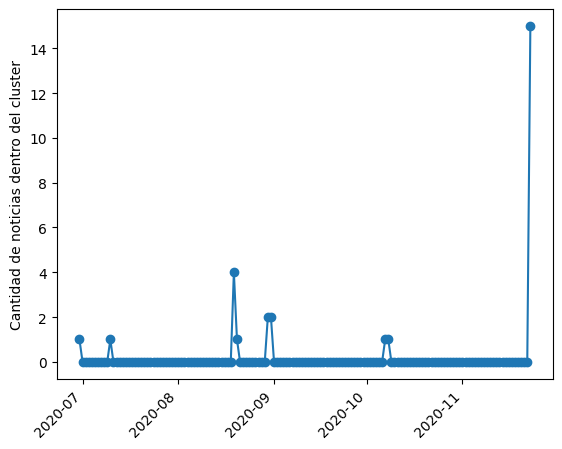

198   , indicó Fernández. También solicitó a la comunidad internacional «cumplimentar las solicitudes contenidas en las cédulas rojas de Interpol ante la eventual presencia de un imputado en sus territorios, algo que Argentina jamás dejó de reclamar


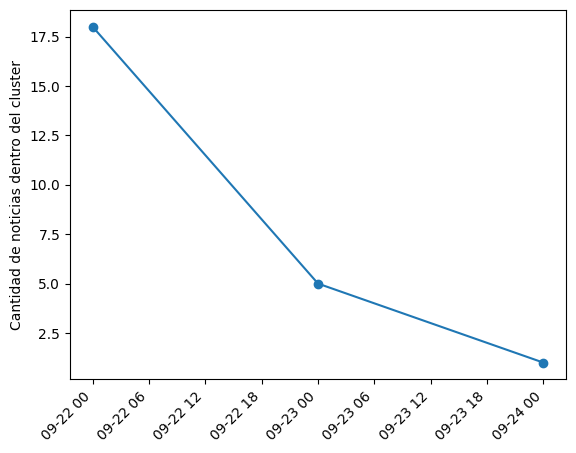

473   el valor de la palabra presidencial


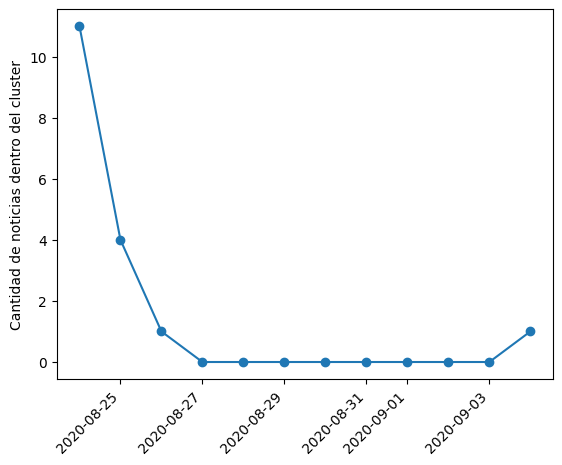

5   es un crimen de la mayor gravedad institucional


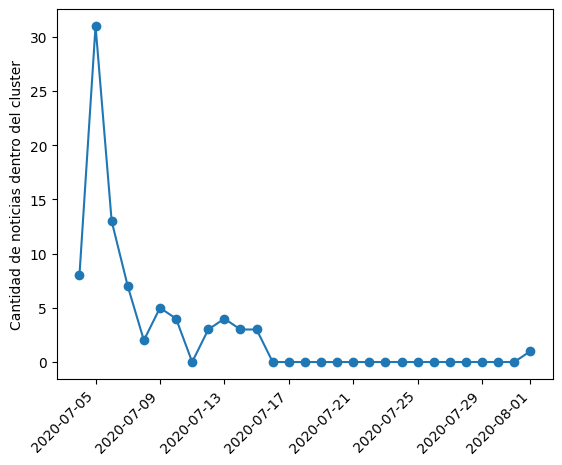

486   la propuesta revisada de reestructuración de la deuda de las autoridades argentinas --en relación a la nueva oferta mejorada para los bonistas-- sería consistente con el restablecimiento de la sostenibilidad de la deuda con alta probabilidad


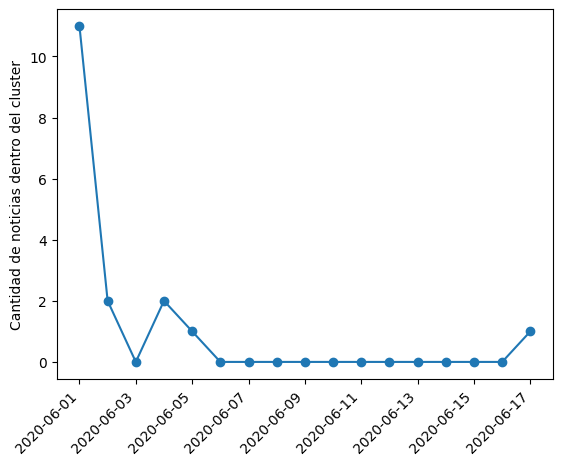

545   Queremos decir que estamos tranquilos, porque creemos en la integridad moral de Darío y confiamos en que la Justicia demostrará que es inocente‘, señaló el comunicado difundido hoy, titulado ‘Unidos en defensa de la verdad y la transparencia


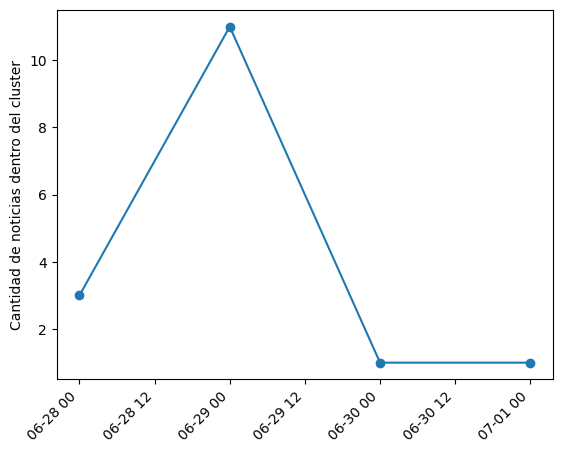

51   La actualización de precios -añadió- tendrá en esta oportunidad como en el futuro el objetivo de recomponer asimetrías históricas a nivel federal, recortando brechas entre la Capital Federal y el interior del país


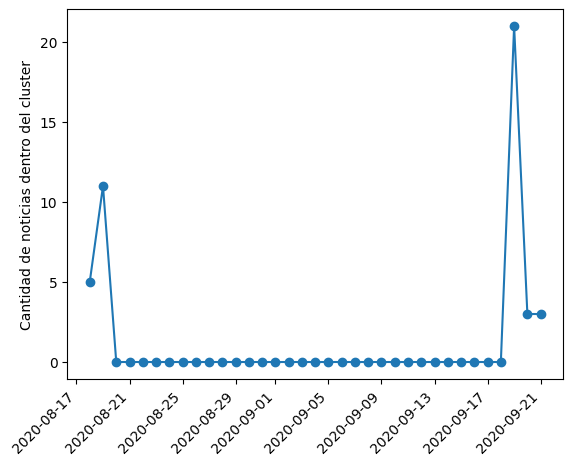

83   Para terminar -dijo Fernández- quiero reafirmar los legítimos e imprescriptibles derechos de soberanía de la República Argentina sobre las Islas Malvinas, Georgias del Sur, Sandwich del Sur y los espacios marítimos circundantes, los cuales forman parte integrante del territorio nacional argentino. Y que se encuentran ocupados ilegalmente por el Reino Unido desde hace ya más de 187 años


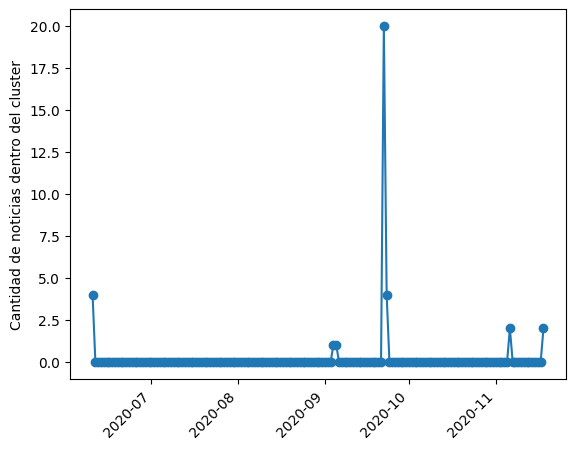

457   cualquier aumento de precios o modificación de los mismos, establecidos o anunciados desde el 31 de julio y hasta el 31 de diciembre de 2020 por los licenciatarios TIC, incluyendo los servicios de radiodifusión por suscripción mediante vínculo físico o radioeléctrico y los correspondientes al servicio de telefonía fija o móvil, en cualquiera de sus modalidades


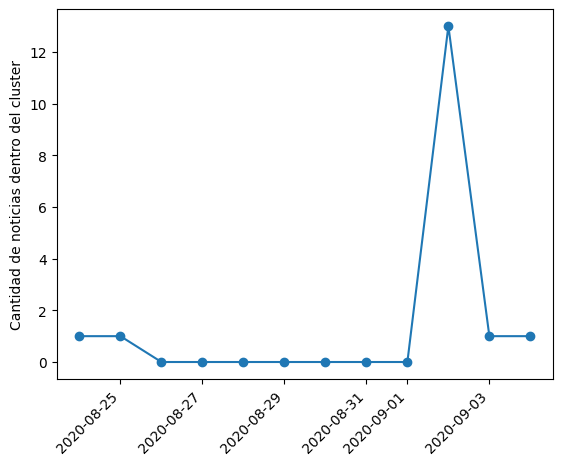

97   anida la misma vocación de construir una industria nacional y un contrato social que permita alcanzar ese futuro y la decisión de hacerlo


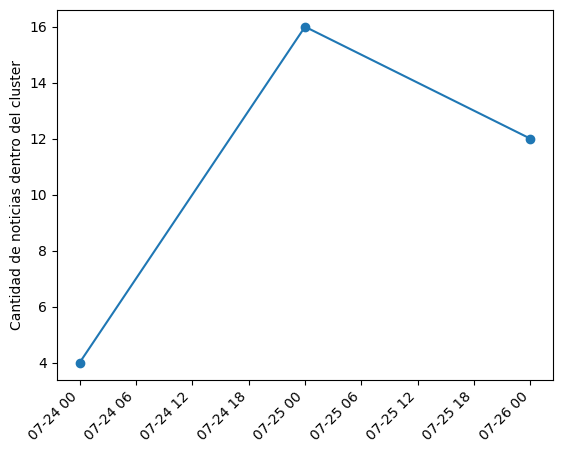

253   Cabe destacar que la magnitud de la estructura ilícita reseñada, cuya inserción abarcaría distintos ámbitos del Estado Nacional, Provincial y Local, permite presumir que quienes habrían participado en los hechos materia de investigación cuentan con los medios y/o vínculos para eludir la aplicación de la ley penal


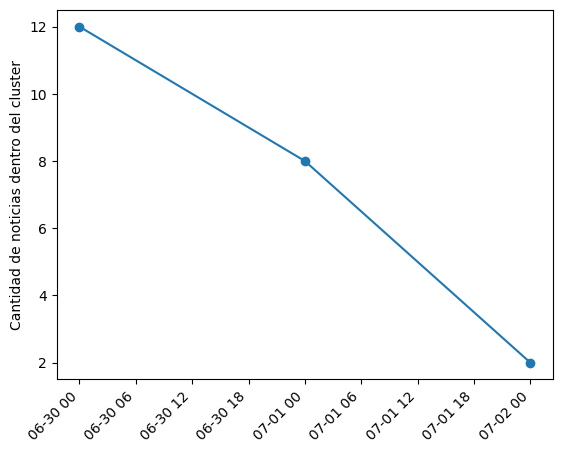

205   Anses requerirá a la Administración Federal De Ingresos Públicos  (AFIP) la realización de la evaluación socioeconómica y patrimonial a  fin de determinar la pertinencia de cada solicitud.


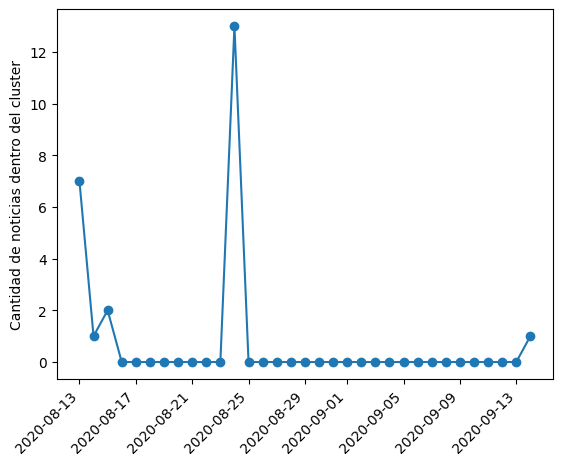

319   Cuesta entender las motivaciones de la carta de la vicepresidenta dirigida al presidente (Alberto Fernández) y las versiones que sostuvieron que hubo acercamientos con gente de mi entorno. Quiero negar rotundamente esa información y cualquier acercamiento


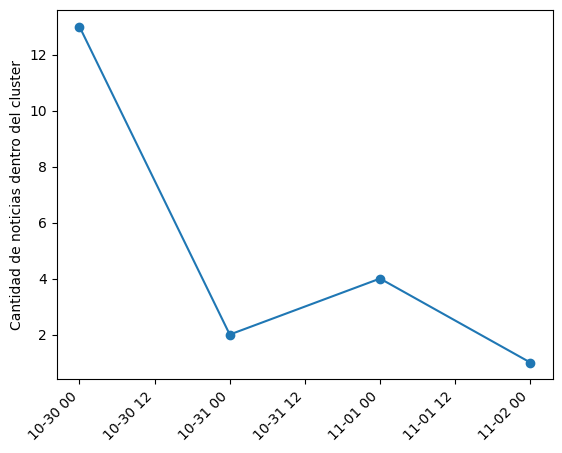

108   hubo un antes y un después de Néstor


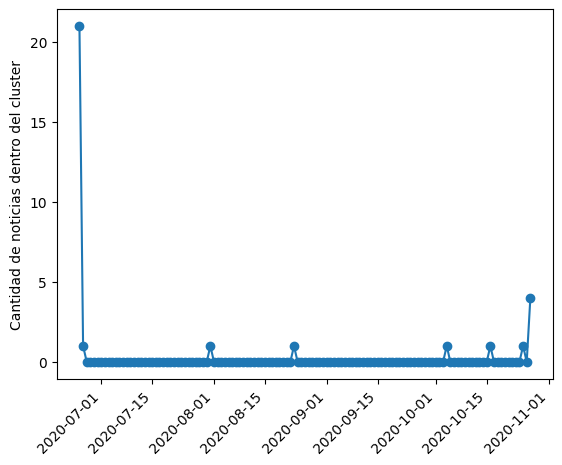

578   Les pido a todos que sigan batallando para volver a normalizar el país


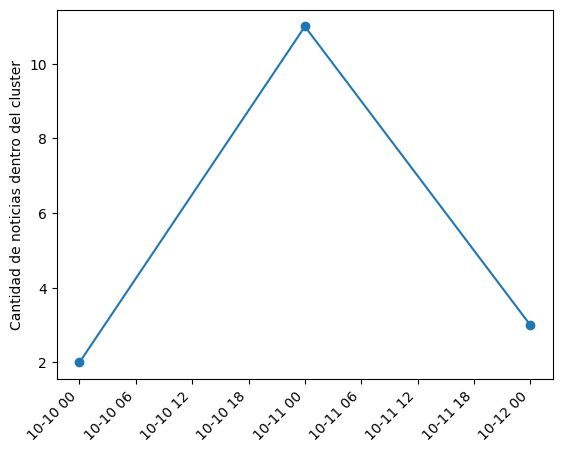

463   Fue una muy buena reunión. Pudimos hablar distendidos sobre los problemas de la región en general y de Argentina y Uruguay en particular. Los dos sentimos que debemos hacer mucho más profundo el vínculo y la relación de nuestros pueblos


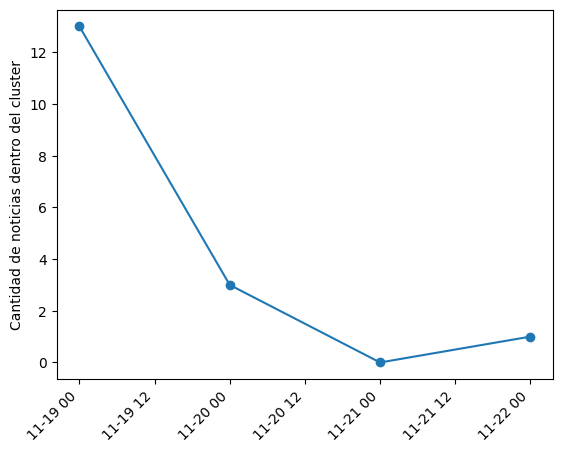

141   recomiendo que solamente se consideren viajes o reuniones presenciales para asuntos de vital importancia e impostergables y con comitivas reducidas


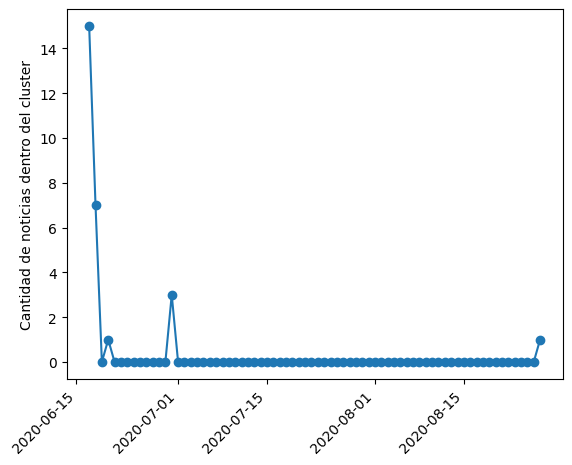

233   A partir del cronograma que anunciaremos en unos días, que comenzará en agosto entregado a la misma gente, será de diez mil pesos sin necesidad de inscribirse de nuevo, sino que es la misma población por el mismo monto por tercera vez desde ingreso excepcional y de emergencia que tiene que ver con el IFE


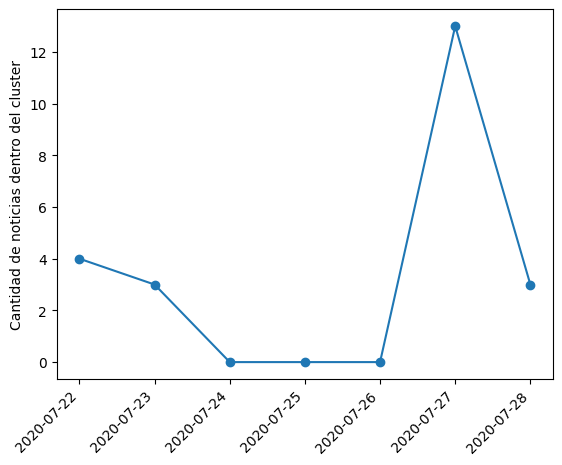

310   permitiendo que el proceso sea más rápido y seguro


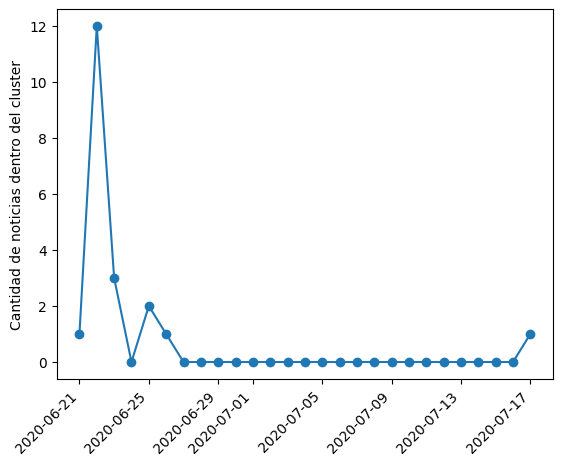

413   Fue un paso en la dirección correcta


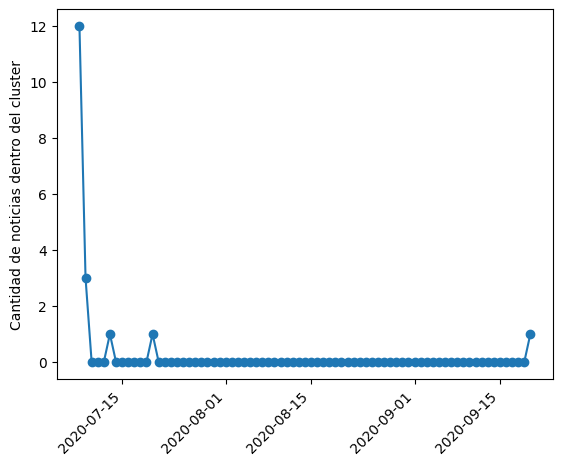

105   Dí positivo de coronavirus. Como sociedad, hoy atravesamos el momento más difícil porque nos acercamos al pico de contagios. Les pido que se cuiden y que tratemos de minimizar el riesgo entre todos y todas. Por favor, quédense en sus casas todo lo que puedan


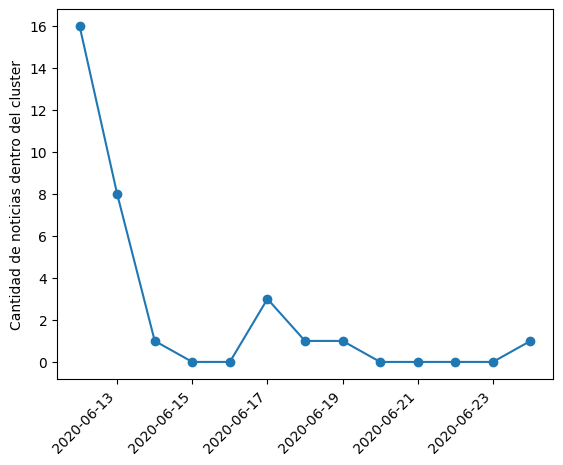

164   Se dispone con carácter de medida autosatisfactoria y previa presentación de contracautela, que los administradores naturales de la sociedad concursada, designados conforma la última Asamblea Ordinaria de accionistas, continúen ejerciendo las funciones para las cuales fueron designados, conforme al estatuto de la misma


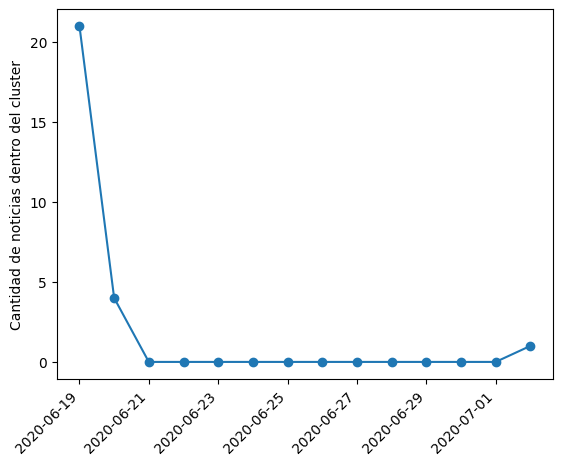

458   Esta suspensión se aplicará a los servicios de televisión satelital por suscripción


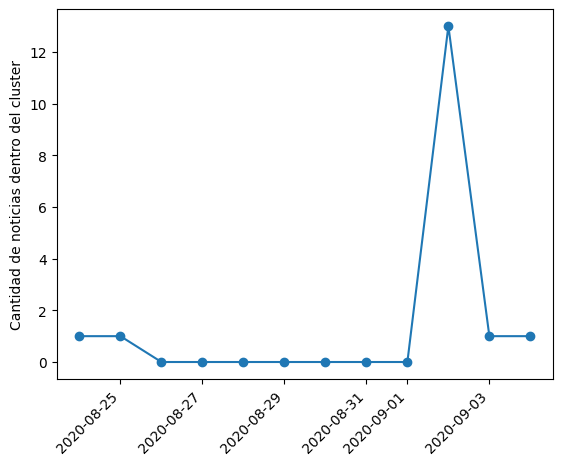

77   Convenio de transferencia progresiva a la Ciudad Autónoma de Buenos Aires de facultades y funciones de seguridad en todas las materias no federales ejercidas en la Ciudad Autónoma de Buenos Aires


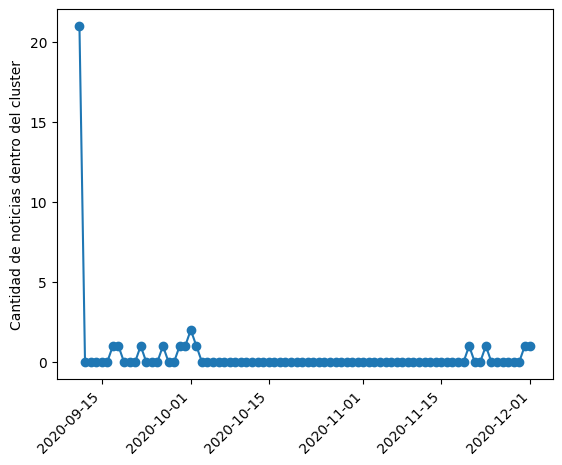

185   Este aumento se encuentra en línea con la decisión de ir recortando brechas entre la Capital Federal y el resto de las provincias


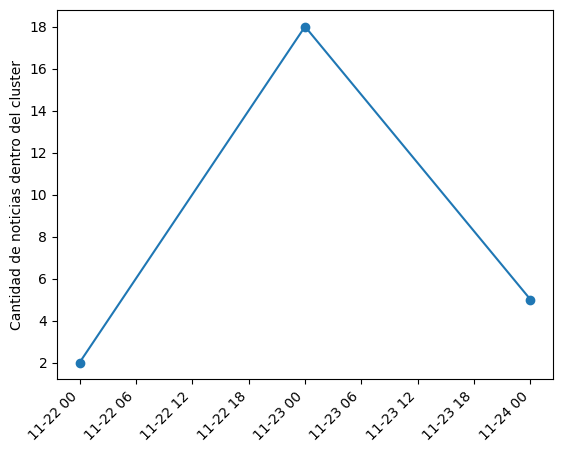

282   Unidos en defensa de la verdad y la transparencia


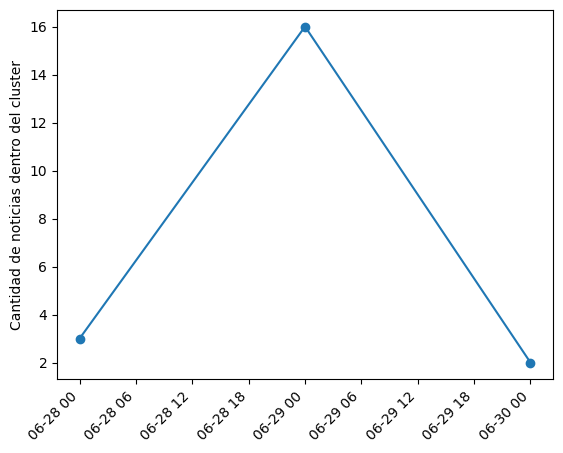

447   Mendoza tiene todo para vivir  como un país independiente, pero no lo tiene hoy. Hoy necesita de la Argentina y la Argentina lo perjudica en la calificación de riesgo, en el acceso de crédito internacional, para traer inversiones, etcétera. Podría ser un país pero con un programa común de su elite política empresaria para desarrollar ese camino


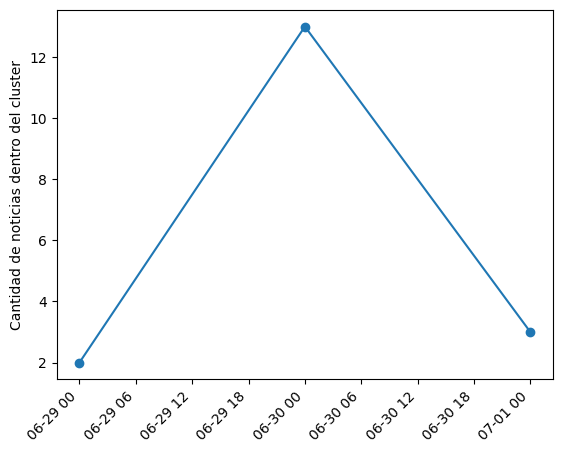

163   en las enmiendas finales de la oferta


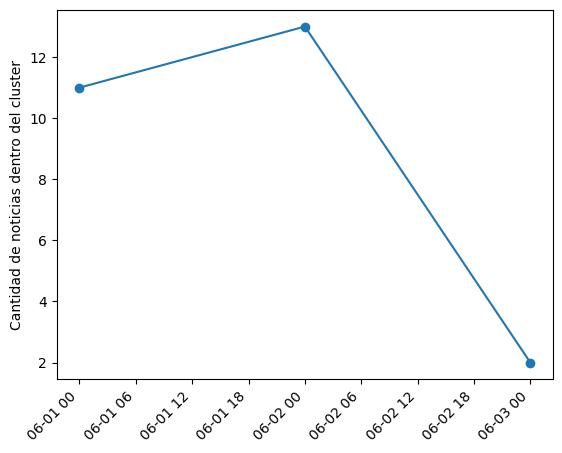

145   efectuar suspensiones por las causales de fuerza mayor o falta o disminución de trabajo


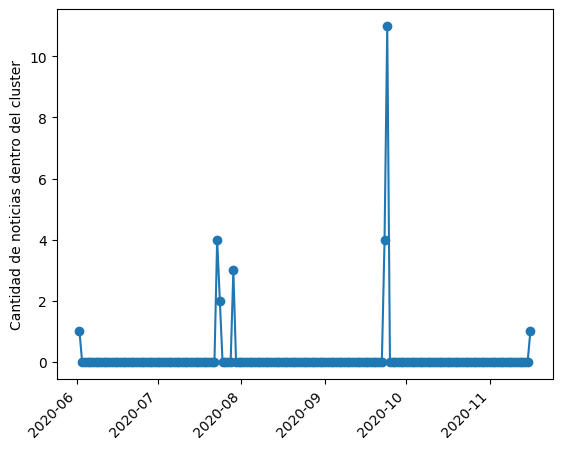

0

In [84]:
def grafico_posibles_series(df, frases_threshold, dias_threshold):
    grouped = df.groupby(['Fecha', 'id_cluster']).size().reset_index(name='num_frases')
    clusters_id_max_30 = list(set(grouped[grouped['num_frases']>frases_threshold]['id_cluster']))
    for clus in clusters_id_max_30:        
        cluster_1 = df[df['id_cluster'] == str(clus)].copy()
        cluster_1['longitud'] = cluster_1['Cita'].apply(lambda x: len(x))
        longest_phrase_row = cluster_1.loc[cluster_1['longitud'].idxmax()]['Cita']
        conteo_fechas = cluster_1['Fecha'].value_counts().reset_index()
        cont_ordenado = conteo_fechas.sort_values('Fecha')
        fecha_minima = cluster_1['Fecha'].min()
        fecha_maxima = cluster_1['Fecha'].max()
        rango_fechas_completo = pd.date_range(fecha_minima, fecha_maxima, freq='D')
        df_fechas = pd.DataFrame({'Fecha': rango_fechas_completo, 'count':0})
        cont_ordenado = pd.merge(cont_ordenado, df_fechas, on='Fecha',how='right')
        cont_ordenado['count_x'] = cont_ordenado['count_x'].fillna(0)


        if len(list(set(cluster_1['Fecha']))) > dias_threshold :
            plt.figure()
            print(clus, ' ',longest_phrase_row)
            plt.plot(cont_ordenado['Fecha'], cont_ordenado['count_x'], 'o-')
            plt.ylabel('Cantidad de noticias dentro del cluster')
            plt.xticks(rotation=45, ha='right')
            plt.show()
        else:
            pass
    return 0
grafico_posibles_series(sub_base, 10, 2)

In [9]:
from collections import Counter
frecuencia = Counter(cluste_map.values())
frecuencia

Counter({'1': 156,
         '7': 71,
         '4': 63,
         '13': 51,
         '31': 48,
         '24': 44,
         '44': 42,
         '17': 39,
         '59': 38,
         '35': 33,
         '15': 32,
         '110': 30,
         '102': 29,
         '23': 28,
         '52': 28,
         '27': 27,
         '42': 26,
         '117': 26,
         '123': 25,
         '159': 25,
         '80': 22,
         '140': 20,
         '304': 20,
         '29': 19,
         '61': 19,
         '101': 19,
         '345': 19,
         '49': 18,
         '244': 18,
         '292': 18,
         '382': 18,
         '69': 17,
         '131': 17,
         '234': 17,
         '326': 17,
         '344': 17,
         '450': 17,
         '8': 16,
         '19': 16,
         '45': 16,
         '71': 16,
         '91': 16,
         '63': 15,
         '104': 15,
         '118': 15,
         '169': 15,
         '612': 15,
         '616': 15,
         '78': 14,
         '144': 14,
         '528': 14,
         '

In [13]:
cluste_map
[k for k, v in cluste_map.items() if v == '1']


['. Guzmán indicó que ',
 ' y consideró que ',
 ' y agregó que ',
 ' y añadió que ',
 '. Guzmán consideró que ',
 ', y señaló que ',
 ' y resaltó que ',
 ', y remarcó que ',
 ' y señaló que ',
 ' y recordó que ',
 ' y expresó que ',
 ', y consideró que ',
 '. También resaltó que ',
 ', y recordó que ',
 ' respondió y agregó que ',
 ', destacó. Fernández recordó que ',
 ', indicó. Fernández explicó que ',
 ' y planteó que ',
 '. Resaltó así que ',
 '. También señalaron que ',
 '. Consideró también que ',
 '. También añaden que ',
 ' y subrayó que ',
 ' el artículo y afirmó que ',
 ' Además, señaló que ',
 ' y sugirió que ',
 ' y señalan que ',
 ' y afirmó que ',
 ' y advirtió que ',
 ' y remarcó que ',
 '. López consideró que ',
 ' y aseveró que además de ',
 ' y aseguró que ',
 ', y asumió que ',
 ', y puntualizó que ',
 ', y añadió que ',
 ', y aseguró que ',
 ', advirtió.Fernández contó que ',
 ' y mencionó que ',
 ' y eva